<a href="https://colab.research.google.com/github/SqweeksOp/AV-Job-a-thon/blob/main/ADS_training_Wholesaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl

import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
path="/content/drive/MyDrive/Project_data/ADS_policy/Wholesaler/Train/"
count=0
print("Loading Data...")
for filename in os.listdir("/content/drive/MyDrive/Project_data/ADS_policy/Wholesaler/Train"):
    if filename.endswith(".csv"):
      if count==0:
        df1=pd.read_csv(path+filename,index_col=0)
      else:
        df=pd.read_csv(path+filename,index_col=0)
        df1=df1.append(df)
      if count==2000:
        break
      count+=1
print(count)

Loading Data...
2000


In [6]:
import os
path="/content/drive/MyDrive/Project_data/ADS_policy/Wholesaler/Test/"
count=0
print("Loading Data...")
for filename in os.listdir("/content/drive/MyDrive/Project_data/ADS_policy/Wholesaler/Test"):
    if filename.endswith(".csv"):
      if count==0:
        df_test=pd.read_csv(path+filename,index_col=0)
      else:
        df=pd.read_csv(path+filename,index_col=0)
        df_test=df_test.append(df)
      if count==500:
        break
      count+=1
print(count)

Loading Data...
499


In [7]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0                0.0  ...         0.0        0.0
4   4.0               69.0  ...         0.0        0.0

[5 rows x 14 columns]

In [8]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0                0.0  ...         0.0        0.0
4   4.0               79.0  ...         0.0        0.0

[5 rows x 14 columns]

In [9]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [10]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (104052, 13)
shape of test set  set is (25948, 13)
shape of train labels  set is (104052,)
shape of test labels  set is (25948,)


- Remove Correlated filter

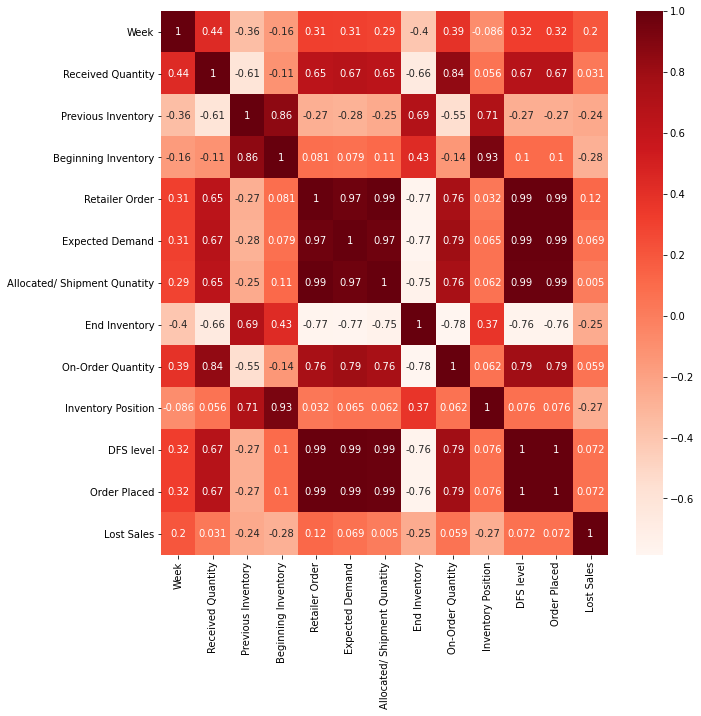

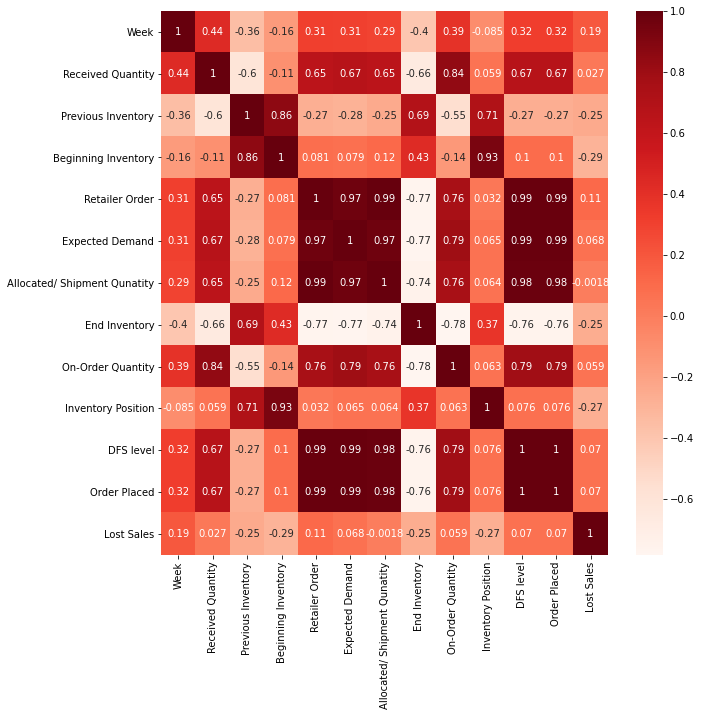

In [11]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Retailer Order', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [14]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis =1 )


In [15]:
X_train.head()

Week  Received Quantity  ...  Inventory Position  Lost Sales
0   0.0                0.0  ...                 0.0         0.0
1   1.0                0.0  ...               200.0         0.0
2   2.0                0.0  ...               131.0         0.0
3   3.0                0.0  ...               128.0         0.0
4   4.0               69.0  ...               132.0         0.0

[5 rows x 9 columns]

In [16]:
X_train.shape

(104052, 9)

In [17]:
X_test.shape

(25948, 9)

- Correlation


In [18]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104052
    Positive: 8186 (7.87% of total)



In [19]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, po, 100 * po / tot))

Examples:
    Total: 25948
    Positive: 2160 (8.32% of total)



In [ ]:
!pip install imbalanced-learn

In [20]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [22]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 95866, 1: 8186})


Counter({0: 23788, 1: 2160})

OVER and Under Sampling pipeline

OVER SAMPLING

In [23]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.40)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95866, 1: 38346})


UNDER SAMPLING

In [24]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 38346, 1: 38346})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [25]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
76682  1
76683  1
76684  1
76685  1
76686  1
76687  1
76688  1
76689  1
76690  1
76691  1

In [26]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2  ...          6          7          8
76662  27.000000  79.421809   0.789096  ...  78.000000  80.000000   0.000000
76663  34.000000  78.000000   5.886292  ...  76.113708  82.000000   0.000000
76664  30.208199  75.791801   0.000000  ...  80.000000  83.791801   0.000000
76665  43.669745  75.000000   0.000000  ...  83.330255  83.330255  10.000000
76666  38.952933  78.000000   0.000000  ...  77.952933  77.952933   4.952933
76667  37.731923  78.268077   0.000000  ...  78.463847  82.731923   0.000000
76668  27.087734  79.912266   0.000000  ...  81.087734  83.087734   0.000000
76669  31.317840  69.682160   0.000000  ...  78.000000  78.000000   7.682160
76670  19.091034  77.908966   0.182068  ...  80.908966  85.182068   0.000000
76671  47.000000  72.000000   0.000000  ...  77.574025  77.574025   4.425975
76672  33.000000  76.831302   1.168698  ...  78.584349  84.584349   0.000000
76673  45.488750  74.511250   0.000000  ...  81.000000  81.000000  10.000000
76674  30.022962  77.068887  14.954075  ...  78.977038  97.000000   0.000000
76675  27.096043  70.807914   0.000000  ...  73.807914  73.807914   9.192086
76676  49.000000  78.934705   0.000000  ...  79.065295  83.000000   0.000000
76677  20.937480  78.968740   0.000000  ...  80.031260  85.000000   0.000000
76678  38.603258  74.698371   0.000000  ...  77.000000  77.000000  16.698371
76679  38.311490  76.000000   0.000000  ...  77.000000  78.000000   0.000000
76680  46.949628  77.000000   0.000000  ...  77.949628  77.949628   1.000000
76681  24.379133  75.310434   0.000000  ...  74.689566  74.689566   2.310434
76682  48.000000  74.000000   0.000000  ...  77.760571  77.760571  12.760571
76683  34.169531  79.415235   3.584765  ...  78.000000  83.000000   0.000000
76684  31.000000  72.995180   0.000000  ...  74.004820  76.004820   0.000000
76685  29.000000  78.101749   6.101749  ...  78.898251  82.898251   0.000000
76686  46.101745  80.000000   2.000000  ...  80.898255  87.000000   0.000000
76687  36.878986  69.000000   0.000000  ...  76.000000  76.000000   8.000000
76688  30.710400  75.000000   0.000000  ...  78.710400  78.710400   9.000000
76689  41.235210  74.000000   0.000000  ...  77.000000  77.000000  11.764790
76690  22.684413  73.053238   7.631175  ...  79.000000  80.368825   0.000000
76691  32.239331  79.000000   3.000000  ...  77.619666  82.000000   0.000000

[30 rows x 9 columns]

In [27]:
X_train.shape

(76692, 9)

In [28]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 76692
    Positive: 38346 (50.00% of total)



In [29]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.1)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [30]:
train_df.shape

(69022, 9)

In [31]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 69022
    Positive: 34540 (50.04% of total)



In [32]:
a=pd.DataFrame(bool_train_labels)
a.shape

(69022, 1)

In [33]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (69022,)
Validation labels shape: (7670,)
Test labels shape: (25948,)
Training features shape: (69022, 9)
Validation features shape: (7670, 9)
Test features shape: (25948, 9)


In [34]:
from sklearn.decomposition import PCA

In [35]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [36]:
var_ratio

{2: 0.7464956897609042,
 3: 0.8498378528337929,
 4: 0.9301918945180081,
 5: 0.9721522407684607,
 6: 0.9904798395870141,
 7: 0.999965817263025,
 8: 0.9999999999999999,
 9: 0.9999999999999999}

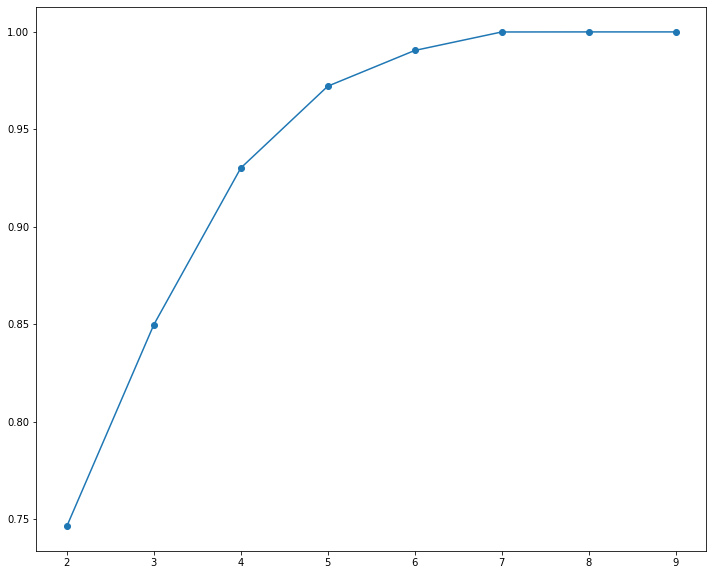

In [37]:
pd.Series(var_ratio).plot(marker="o")

In [38]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[ 1.99110407, -1.33924561,  0.38143785, -0.23909457,  0.15586881,
        -0.25842784],
       [-1.64013765,  0.14143868,  0.57106008, -0.05794387,  0.18393653,
        -0.09372583],
       [-1.06838144,  0.503921  , -0.79592755, -0.43951911,  0.17754877,
         0.04102898],
       ...,
       [-1.36256954, -0.10215869, -0.57700823, -0.86721281,  0.15310081,
         0.28318638],
       [ 1.88842951, -0.46403484, -0.55242185,  1.36751151, -0.1626074 ,
         0.01718679],
       [-1.26178023,  0.29121267, -0.52580426, -0.89978344,  0.42230758,
         0.12575189]])

In [39]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [40]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0      1.991104 -1.339246  0.381438 -0.239095  0.155869 -0.258428
1     -1.640138  0.141439  0.571060 -0.057944  0.183937 -0.093726
2     -1.068381  0.503921 -0.795928 -0.439519  0.177549  0.041029
3     -1.904072  0.636524  1.906079  1.304183 -0.520894 -0.167257
4      2.283103 -1.808588  0.164261 -0.199052 -0.733319  0.051364
...         ...       ...       ...       ...       ...       ...
69017 -0.474789 -0.584799 -0.222984 -1.085738  0.004879  0.202124
69018 -1.398194  0.346570 -0.481708 -1.241598  0.377822  0.042207
69019 -1.362570 -0.102159 -0.577008 -0.867213  0.153101  0.283186
69020  1.888430 -0.464035 -0.552422  1.367512 -0.162607  0.017187
69021 -1.261780  0.291213 -0.525804 -0.899783  0.422308  0.125752

[69022 rows x 6 columns]

In [41]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [42]:
pos_df.shape

(34540, 6)

In [43]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))




In [44]:
val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [45]:
val_features.shape

(7670, 1, 6)

In [46]:
test_features.shape

(25948, 1, 6)

In [47]:
train_features.shape

(69022, 1, 6)

In [48]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout

In [49]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)

  model = keras.Sequential([
      keras.layers.LSTM(
        30, activation='relu',
          input_shape=(train_features.shape[1], train_features.shape[2]),return_sequences=True),
      keras.layers.Dropout(0.2),
        keras.layers.LSTM(30,activation ="relu"),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(6,activation="relu"),
      # keras.layers.Dense(4,activation="relu"),
      # keras.layers.Dense(2,activation="sigmoid"),
      # keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [52]:
EPOCHS = 150
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [53]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 30)             4440      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 30)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,791
Trainable params: 11,791
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.predict(train_features[:10])

array([[0.56612015],
       [0.5663581 ],
       [0.5649757 ],
       [0.56746215],
       [0.5661243 ],
       [0.56633335],
       [0.5678944 ],
       [0.5652103 ],
       [0.565014  ],
       [0.56678134]], dtype=float32)

In [55]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7024


In [56]:
initial_bias = np.log([pos/neg])
initial_bias

array([0.00168062])

In [57]:

model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.50156856],
       [0.49971113],
       [0.5000166 ],
       [0.4993804 ],
       [0.5016245 ],
       [0.4999347 ],
       [0.4996688 ],
       [0.50155574],
       [0.50038457],
       [0.49891087]], dtype=float32)

In [58]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6940


In [59]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [60]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [61]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [62]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [63]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

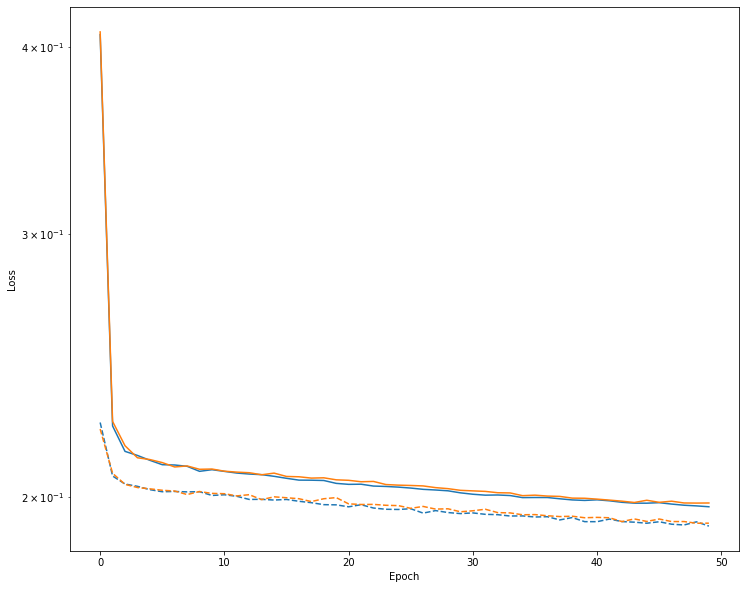

In [64]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [65]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/150
270/270 [==============================] - 7s 11ms/step - loss: 0.5601 - tp: 20768.3026 - fp: 6649.7712 - tn: 14601.8672 - fn: 464.3911 - accuracy: 0.8184 - precision: 0.7441 - recall: 0.9766 - auc: 0.9216 - val_loss: 0.2254 - val_tp: 3647.0000 - val_fp: 448.0000 - val_tn: 3416.0000 - val_fn: 159.0000 - val_accuracy: 0.9209 - val_precision: 0.8906 - val_recall: 0.9582 - val_auc: 0.9660
Epoch 2/150
270/270 [==============================] - 2s 6ms/step - loss: 0.2270 - tp: 16671.3432 - fp: 2074.9520 - tn: 15347.5830 - fn: 720.4539 - accuracy: 0.9196 - precision: 0.8894 - recall: 0.9578 - auc: 0.9589 - val_loss: 0.2067 - val_tp: 3670.0000 - val_fp: 453.0000 - val_tn: 3411.0000 - val_fn: 136.0000 - val_accuracy: 0.9232 - val_precision: 0.8901 - val_recall: 0.9643 - val_auc: 0.9679
Epoch 3/150
270/270 [==============================] - 2s 6ms/step - loss: 0.2156 - tp: 16806.4170 - fp: 2142.2435 - tn: 15263.2768 - fn: 602.3948 - accuracy: 0.9212 - precision: 0.8875 - recall: 0.9

In [66]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

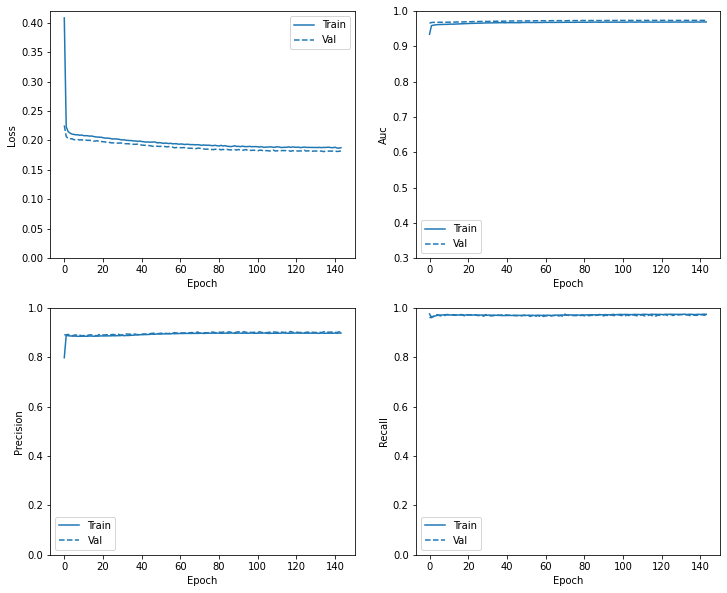

In [67]:
plot_metrics(baseline_history)

In [68]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [69]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.2082841992378235
tp :  2078.0
fp :  2440.0
tn :  21348.0
fn :  82.0
accuracy :  0.9028056263923645
precision :  0.45993801951408386
recall :  0.9620370268821716
auc :  0.9714558124542236

(True Negatives):  21348
 (False Positives):  2440
(False Negatives):  82
 (True Positives):  2078
Total Transactions:  2160


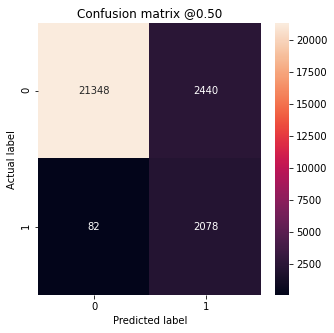

In [70]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# LSTM

In [71]:
test_predictions_baseline

array([[1.9448412e-15],
       [5.7574600e-02],
       [7.6430348e-05],
       ...,
       [4.8073649e-02],
       [2.9465109e-02],
       [1.2637436e-02]], dtype=float32)

In [72]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

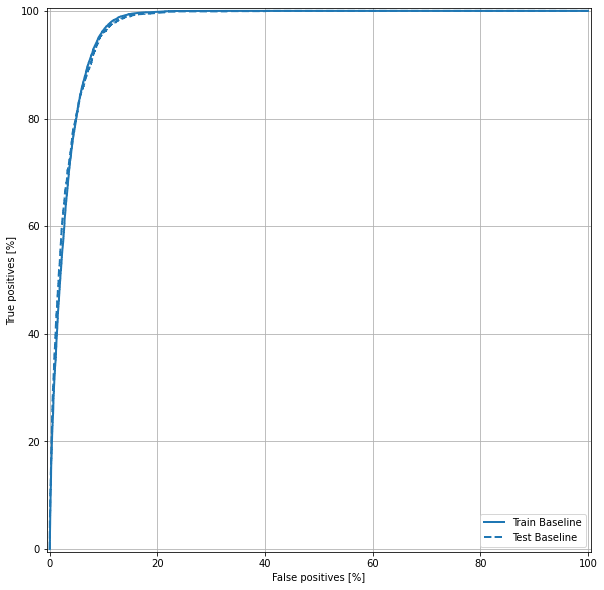

In [73]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [74]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/150
1348/1348 [==============================] - 11s 5ms/step - loss: 0.4524 - tp: 20823.4774 - fp: 9385.1119 - tn: 35981.6612 - fn: 2957.6783 - accuracy: 0.8188 - precision: 0.6484 - recall: 0.8692 - auc: 0.8868 - val_loss: 0.3633 - val_tp: 4303.0000 - val_fp: 1077.0000 - val_tn: 3743.0000 - val_fn: 461.0000 - val_accuracy: 0.8395 - val_precision: 0.7998 - val_recall: 0.9032 - val_auc: 0.9112
Epoch 2/150
1348/1348 [==============================] - 6s 4ms/step - loss: 0.3597 - tp: 19170.1312 - fp: 4567.8006 - tn: 17080.1579 - fn: 2381.8391 - accuracy: 0.8410 - precision: 0.8092 - recall: 0.8907 - auc: 0.9129 - val_loss: 0.3610 - val_tp: 4267.0000 - val_fp: 1053.0000 - val_tn: 3767.0000 - val_fn: 497.0000 - val_accuracy: 0.8383 - val_precision: 0.8021 - val_recall: 0.8957 - val_auc: 0.9120
Epoch 3/150
1348/1348 [==============================] - 5s 4ms/step - loss: 0.3643 - tp: 19131.1601 - fp: 4613.4359 - tn: 17065.3336 - fn: 2389.9993 - accuracy: 0.8381 - precision: 0.8057 - 

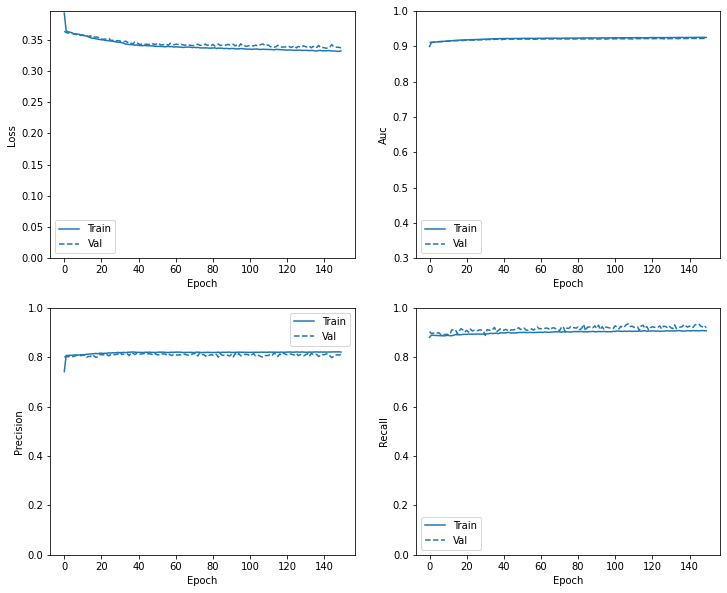

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.37810346484184265
tp :  1902.0
fp :  4757.0
tn :  19035.0
fn :  254.0
accuracy :  0.8068829774856567
precision :  0.28562846779823303
recall :  0.8821892142295837
auc :  0.9157237410545349

(True Negatives):  19035
 (False Positives):  4757
(False Negatives):  254
 (True Positives):  1902
Total Transactions:  2156


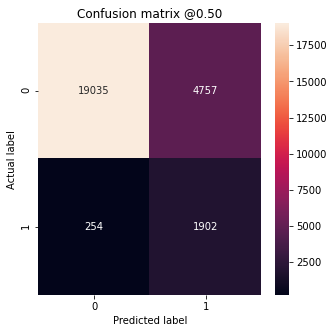

In [ ]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

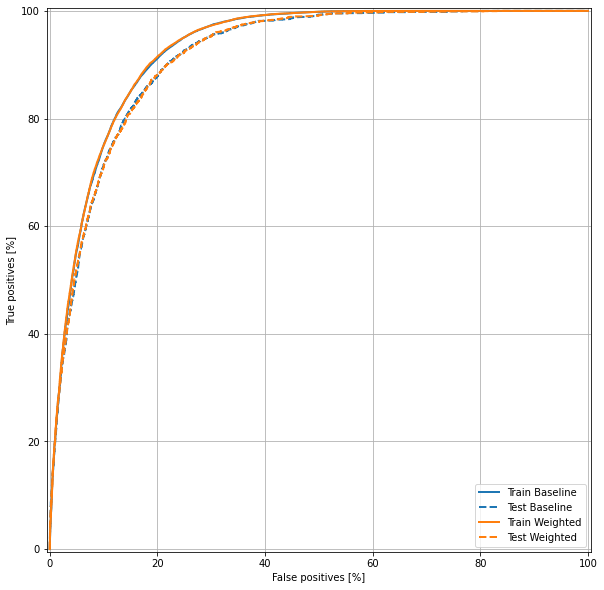

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(43100, 1, 6)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(86200, 1, 6)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-1.25087284  2.33998818  0.78402064 -1.04799922 -0.25398221]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 5), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.46875


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

1699.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/500
1699/1699 [==============================] - 7s 3ms/step - loss: 0.6997 - tp: 11427.4924 - fp: 8621.2859 - tn: 33470.3624 - fn: 18377.8218 - accuracy: 0.6291 - precision: 0.5086 - recall: 0.3360 - auc: 0.6398 - val_loss: 0.6146 - val_tp: 764.0000 - val_fp: 2298.0000 - val_tn: 3716.0000 - val_fn: 226.0000 - val_accuracy: 0.6396 - val_precision: 0.2495 - val_recall: 0.7717 - val_auc: 0.7476
Epoch 2/500
1699/1699 [==============================] - 4s 2ms/step - loss: 0.6335 - tp: 20702.2741 - fp: 10962.8412 - tn: 16333.6447 - fn: 6433.2024 - accuracy: 0.6798 - precision: 0.6538 - recall: 0.7582 - auc: 0.7077 - val_loss: 0.5963 - val_tp: 802.0000 - val_fp: 2435.0000 - val_tn: 3579.0000 - val_fn: 188.0000 - val_accuracy: 0.6255 - val_precision: 0.2478 - val_recall: 0.8101 - val_auc: 0.7481
Epoch 3/500
1699/1699 [==============================] - 4s 2ms/step - loss: 0.6190 - tp: 21433.7624 - fp: 11241.9694 - tn: 15932.3294 - fn: 5823.9012 - accuracy: 0.6859 - precision: 0.6557 - 

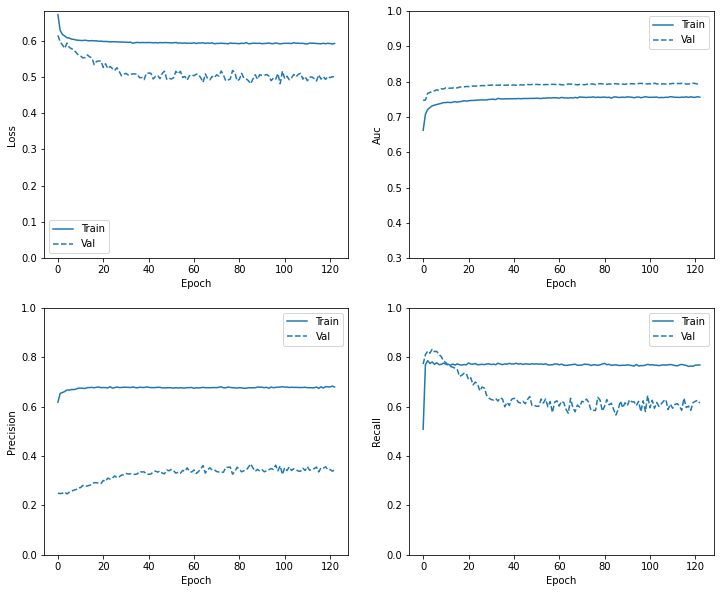

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6446671485900879
tp :  1814.0
fp :  5482.0
tn :  9573.0
fn :  596.0
accuracy :  0.6519896984100342
precision :  0.2486293911933899
recall :  0.7526971101760864
auc :  0.7677501440048218

(True Negatives):  9573
 (False Positives):  5482
(False Negatives):  596
 (True Positives):  1814
Total Transactions:  2410


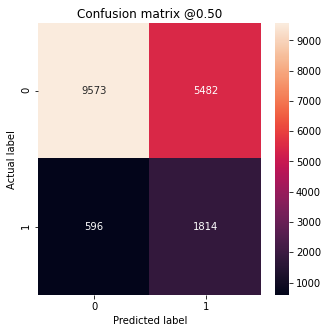

In [ ]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

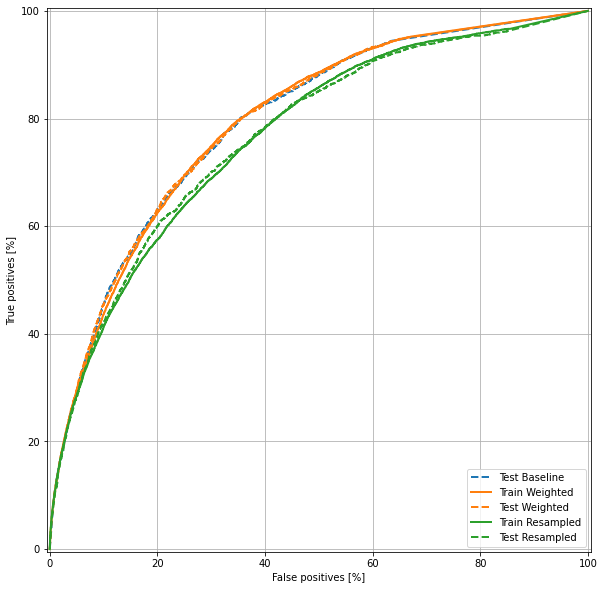

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# GRU

In [128]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0                0.0  ...         0.0        0.0
4   4.0               69.0  ...         0.0        0.0

[5 rows x 14 columns]

In [129]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0                0.0  ...         0.0        0.0
4   4.0               79.0  ...         0.0        0.0

[5 rows x 14 columns]

In [130]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [131]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (104052, 13)
shape of test set  set is (25948, 13)
shape of train labels  set is (104052,)
shape of test labels  set is (25948,)


- Remove Correlated filter

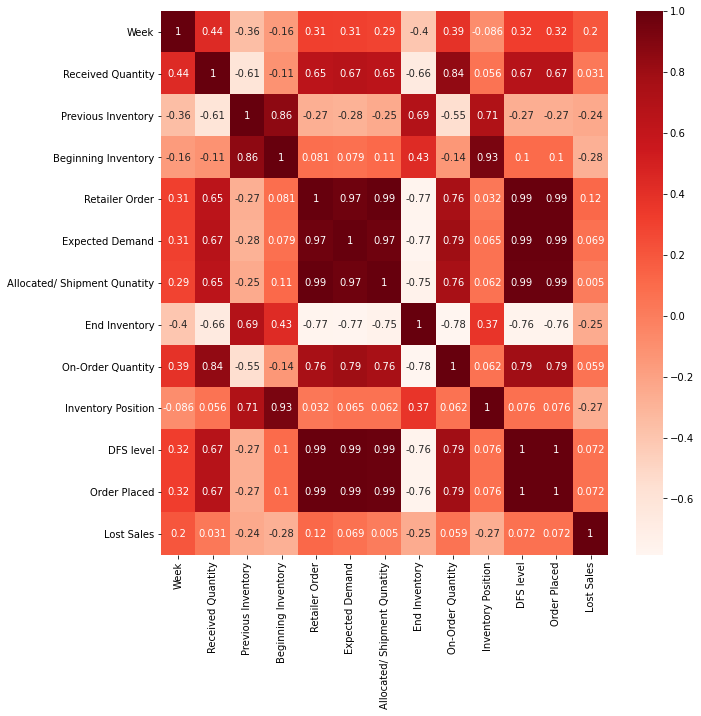

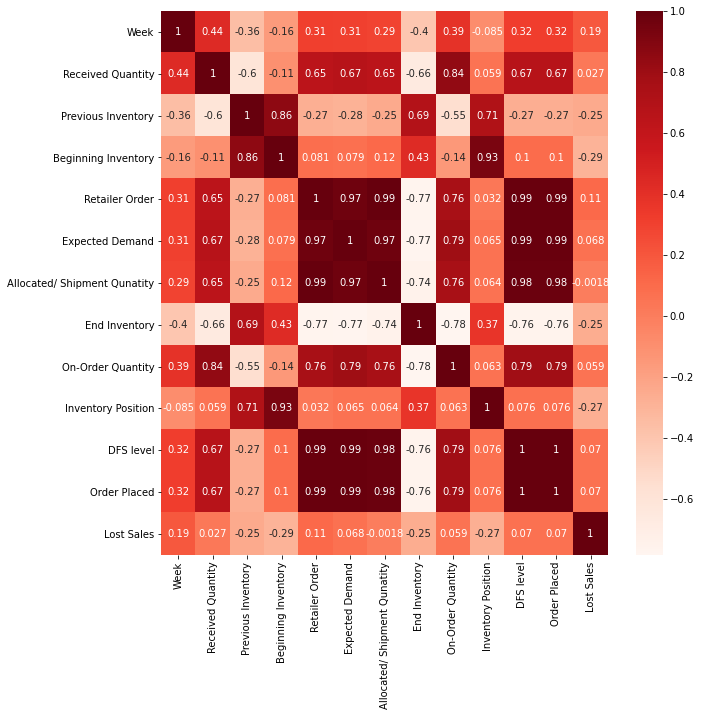

In [132]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [133]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Retailer Order', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [134]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis =1 )


In [135]:
X_train.head()

Week  Received Quantity  ...  Inventory Position  Lost Sales
0   0.0                0.0  ...                 0.0         0.0
1   1.0                0.0  ...               200.0         0.0
2   2.0                0.0  ...               131.0         0.0
3   3.0                0.0  ...               128.0         0.0
4   4.0               69.0  ...               132.0         0.0

[5 rows x 9 columns]

In [136]:
X_train.shape

(104052, 9)

In [137]:
X_test.shape

(25948, 9)

- Correlation


In [138]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104052
    Positive: 8186 (7.87% of total)



In [139]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, po, 100 * po / tot))

Examples:
    Total: 25948
    Positive: 2160 (8.32% of total)



In [ ]:
!pip install imbalanced-learn

In [140]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [88]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [89]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 95866, 1: 8186})


Counter({0: 23788, 1: 2160})

OVER and Under Sampling pipeline

OVER SAMPLING

In [141]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.40)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95866, 1: 38346})


UNDER SAMPLING

In [142]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 38346, 1: 38346})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [143]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
76682  1
76683  1
76684  1
76685  1
76686  1
76687  1
76688  1
76689  1
76690  1
76691  1

In [144]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2  ...          6          7         8
76662  38.508464  78.000000   2.245768  ...  77.245768  77.245768  4.000000
76663  39.604427  75.000000   0.000000  ...  79.000000  79.000000  3.000000
76664  47.000000  77.767736   2.232264  ...  78.232264  78.232264  1.232264
76665  25.000000  73.564087   0.000000  ...  75.000000  76.128174  0.000000
76666  46.261398  80.000000   0.000000  ...  83.000000  88.000000  0.000000
76667  35.474447  75.737224   3.000000  ...  78.000000  80.737224  0.000000
76668  23.000000  75.050720   7.949280  ...  76.101440  78.050720  0.000000
76669  30.000000  76.000000   0.959906  ...  74.479953  74.479953  5.520047
76670  32.736511  67.263489   1.000000  ...  70.000000  70.263489  2.946045
76671  16.186126  73.000000   0.000000  ...  72.093063  72.093063  4.279189
76672  37.338871  79.000000   0.000000  ...  84.830564  90.169436  0.000000
76673  33.725779  72.862890   6.274221  ...  75.137110  75.274221  0.862890
76674  42.557267  71.442733   0.442733  ...  72.671801  72.671801  5.557267
76675  38.523596  79.000000   0.000000  ...  79.523596  79.523596  4.000000
76676  34.313888  75.686112   2.000000  ...  76.000000  76.000000  1.000000
76677  31.480404  76.960807   9.000000  ...  76.519596  89.480404  0.000000
76678  47.000000  73.915712   0.000000  ...  78.000000  80.084288  0.000000
76679  45.696964  74.606072   6.393928  ...  82.393928  82.393928  3.000000
76680  38.000000  75.000000   0.000000  ...  80.000000  82.676190  0.000000
76681  23.258671  78.258671   0.000000  ...  80.000000  81.000000  0.000000
76682  32.790285  79.895143  16.104857  ...  77.447571  84.895143  0.000000
76683  27.050393  82.016798  10.983202  ...  82.983202  89.016798  0.000000
76684  34.548909  75.000000   3.000000  ...  75.000000  75.000000  3.548909
76685  26.000000  77.351090   0.000000  ...  80.351090  80.351090  4.648910
76686  44.561179  75.000000   0.000000  ...  76.000000  76.000000  8.438821
76687  36.855059  79.000000   0.000000  ...  82.000000  82.000000  2.144941
76688  47.037727  73.962273   0.000000  ...  80.037727  80.037727  3.000000
76689  35.000000  76.000000   0.000000  ...  80.000000  80.000000  4.243124
76690  28.509130  73.000000   0.000000  ...  78.000000  78.000000  5.490870
76691  36.615742  82.768516   2.615742  ...  82.000000  82.000000  1.615742

[30 rows x 9 columns]

In [145]:
X_train.shape

(76692, 9)

In [146]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 76692
    Positive: 38346 (50.00% of total)



In [147]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.1)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [148]:
train_df.shape

(69022, 9)

In [149]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 69022
    Positive: 34492 (49.97% of total)



In [150]:
a=pd.DataFrame(bool_train_labels)
a.shape

(69022, 1)

In [151]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (69022,)
Validation labels shape: (7670,)
Test labels shape: (25948,)
Training features shape: (69022, 9)
Validation features shape: (7670, 9)
Test features shape: (25948, 9)


In [152]:
from sklearn.decomposition import PCA

In [153]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [154]:
var_ratio

{2: 0.745355106326362,
 3: 0.8484012599135783,
 4: 0.928562018657809,
 5: 0.9713892658396576,
 6: 0.9904038155749232,
 7: 0.9999641907737419,
 8: 0.9999999999999999,
 9: 0.9999999999999999}

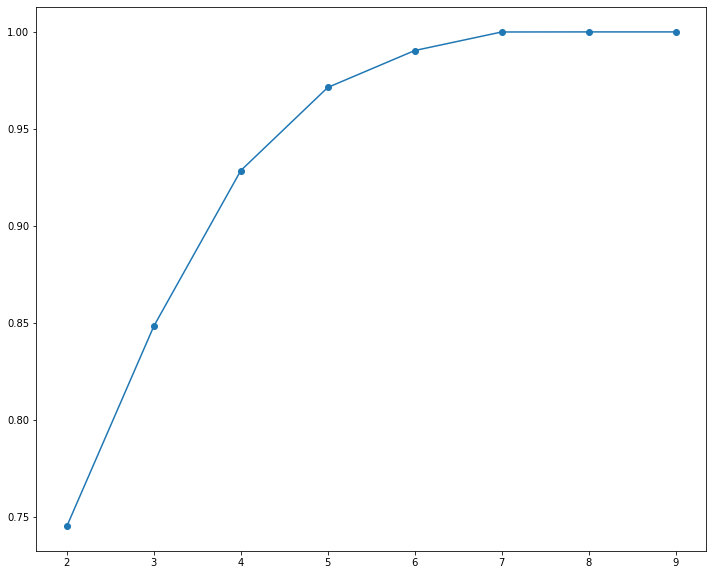

In [155]:
pd.Series(var_ratio).plot(marker="o")

In [156]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[-1.116409  ,  0.101059  , -0.3382695 , -1.09078172,  0.60185456,
        -0.26809816],
       [-1.13786267,  0.08009361, -0.6505292 , -0.68950126,  0.16235634,
         0.04236263],
       [-1.56936049,  0.40248061,  0.36719145, -0.62569522,  0.44980995,
        -0.276212  ],
       ...,
       [ 0.44596129, -0.93457319, -0.42335568,  0.92252012,  0.18509765,
        -0.12275293],
       [-1.12198852,  0.86728142, -0.19141035,  0.46501169, -0.07882218,
         0.23781155],
       [-0.76688345, -0.14191642, -0.95184479,  1.28384164,  0.34872076,
        -0.22340461]])

In [157]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [158]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0     -1.116409  0.101059 -0.338269 -1.090782  0.601855 -0.268098
1     -1.137863  0.080094 -0.650529 -0.689501  0.162356  0.042363
2     -1.569360  0.402481  0.367191 -0.625695  0.449810 -0.276212
3      0.871485 -0.959573 -0.512164  1.556069  0.122718 -0.270255
4     -0.933935  0.287702 -1.011427  0.491124  0.089195  0.051418
...         ...       ...       ...       ...       ...       ...
69017 -1.259667  0.622765 -0.673473 -0.995295  0.321669  0.362837
69018  0.343148 -0.146456 -0.645353 -0.023257 -0.351923  0.104823
69019  0.445961 -0.934573 -0.423356  0.922520  0.185098 -0.122753
69020 -1.121989  0.867281 -0.191410  0.465012 -0.078822  0.237812
69021 -0.766883 -0.141916 -0.951845  1.283842  0.348721 -0.223405

[69022 rows x 6 columns]

In [159]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [160]:
pos_df.shape

(34492, 6)

In [161]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))




In [162]:
val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [163]:
val_features.shape

(7670, 1, 6)

In [164]:
test_features.shape

(25948, 1, 6)

In [165]:
train_features.shape

(69022, 1, 6)

In [166]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Embedding
from keras.layers import Dropout

In [167]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)

  model = keras.Sequential([
      keras.layers.GRU(
        30, activation='relu',
          input_shape=(train_features.shape[1], train_features.shape[2]),return_sequences=True),
      keras.layers.Dropout(0.2),
        keras.layers.GRU(20,activation ="tanh"),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(6,activation="relu"),
      # keras.layers.Dense(4,activation="relu"),
      # keras.layers.Dense(2,activation="sigmoid"),
      # keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [168]:
EPOCHS = 150
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [169]:
model = make_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_10 (GRU)                 (None, 1, 30)             3420      
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 30)             0         
_________________________________________________________________
gru_11 (GRU)                 (None, 20)                3120      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.predict(train_features[:10])

array([[0.6902332 ],
       [0.6902088 ],
       [0.69124955],
       [0.69558054],
       [0.6889522 ],
       [0.6924782 ],
       [0.6945433 ],
       [0.66862386],
       [0.67847437],
       [0.68297654]], dtype=float32)

In [171]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7838


In [172]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.0011011])

In [173]:

model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.51543444],
       [0.51020736],
       [0.5110779 ],
       [0.48856112],
       [0.50010246],
       [0.4936296 ],
       [0.48708534],
       [0.49151334],
       [0.49968895],
       [0.50161797]], dtype=float32)

In [174]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6781


In [176]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [177]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [178]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [179]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [180]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

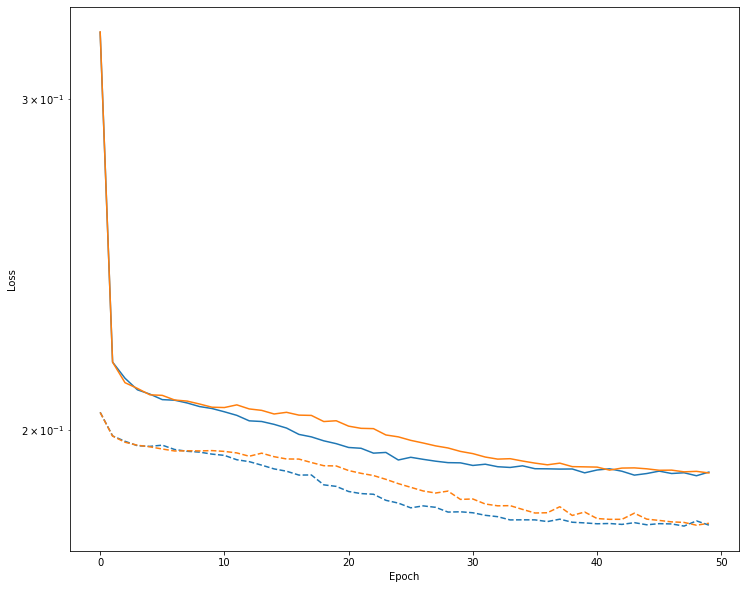

In [181]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [182]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/150
270/270 [==============================] - 8s 11ms/step - loss: 0.4555 - tp: 20316.8635 - fp: 3169.8118 - tn: 18031.2768 - fn: 966.3801 - accuracy: 0.9011 - precision: 0.8656 - recall: 0.9505 - auc: 0.9427 - val_loss: 0.2045 - val_tp: 3738.0000 - val_fp: 442.0000 - val_tn: 3374.0000 - val_fn: 116.0000 - val_accuracy: 0.9272 - val_precision: 0.8943 - val_recall: 0.9699 - val_auc: 0.9665
Epoch 2/150
270/270 [==============================] - 2s 6ms/step - loss: 0.2192 - tp: 16715.6015 - fp: 2133.0517 - tn: 15289.6568 - fn: 676.0221 - accuracy: 0.9192 - precision: 0.8869 - recall: 0.9613 - auc: 0.9601 - val_loss: 0.1987 - val_tp: 3745.0000 - val_fp: 440.0000 - val_tn: 3376.0000 - val_fn: 109.0000 - val_accuracy: 0.9284 - val_precision: 0.8949 - val_recall: 0.9717 - val_auc: 0.9676
Epoch 3/150
270/270 [==============================] - 2s 6ms/step - loss: 0.2116 - tp: 16855.1587 - fp: 2117.6974 - tn: 15240.1771 - fn: 601.2989 - accuracy: 0.9224 - precision: 0.8892 - recall: 0.9

In [183]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

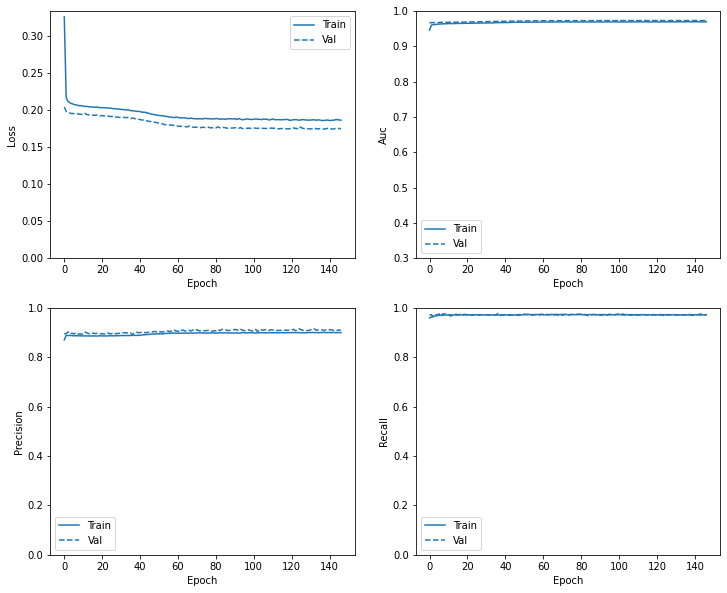

In [184]:
plot_metrics(baseline_history)

In [185]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [186]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.2103809118270874
tp :  2083.0
fp :  2458.0
tn :  21330.0
fn :  77.0
accuracy :  0.9023045897483826
precision :  0.4587095379829407
recall :  0.9643518328666687
auc :  0.9713392853736877

(True Negatives):  21330
 (False Positives):  2458
(False Negatives):  77
 (True Positives):  2083
Total Transactions:  2160


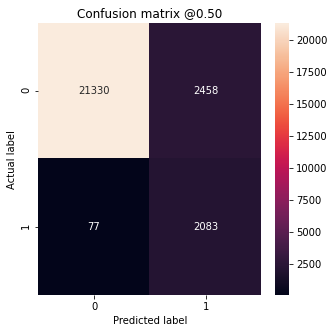

In [187]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# GRU

In [188]:
test_predictions_baseline

array([[3.7744171e-06],
       [6.4670533e-02],
       [1.8250523e-05],
       ...,
       [4.7754407e-02],
       [5.7443976e-04],
       [1.4194367e-05]], dtype=float32)

In [189]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

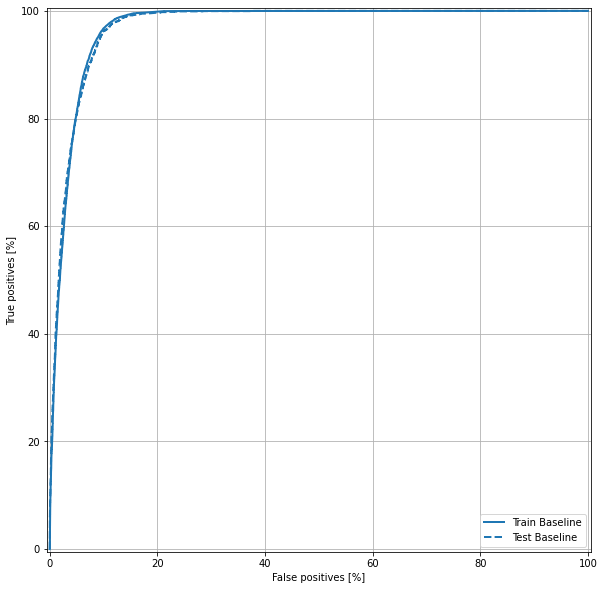

In [190]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/170
510/510 [==============================] - 5s 5ms/step - loss: 0.6061 - tp: 13864.7593 - fp: 5879.9922 - tn: 14075.8728 - fn: 6192.8356 - accuracy: 0.6963 - precision: 0.7023 - recall: 0.6850 - auc: 0.7659 - val_loss: 0.5366 - val_tp: 2778.0000 - val_fp: 1036.0000 - val_tn: 2562.0000 - val_fn: 870.0000 - val_accuracy: 0.7370 - val_precision: 0.7284 - val_recall: 0.7615 - val_auc: 0.8058
Epoch 2/170
510/510 [==============================] - 2s 3ms/step - loss: 0.5487 - tp: 12068.2975 - fp: 4777.7730 - tn: 11596.0705 - fn: 4325.3190 - accuracy: 0.7198 - precision: 0.7145 - recall: 0.7350 - auc: 0.7933 - val_loss: 0.5307 - val_tp: 2666.0000 - val_fp: 926.0000 - val_tn: 2672.0000 - val_fn: 982.0000 - val_accuracy: 0.7367 - val_precision: 0.7422 - val_recall: 0.7308 - val_auc: 0.8100
Epoch 3/170
510/510 [==============================] - 2s 3ms/step - loss: 0.5426 - tp: 12040.8924 - fp: 4730.6947 - tn: 11720.9237 - fn: 4274.9491 - accuracy: 0.7250 - precision: 0.7165 - recall: 

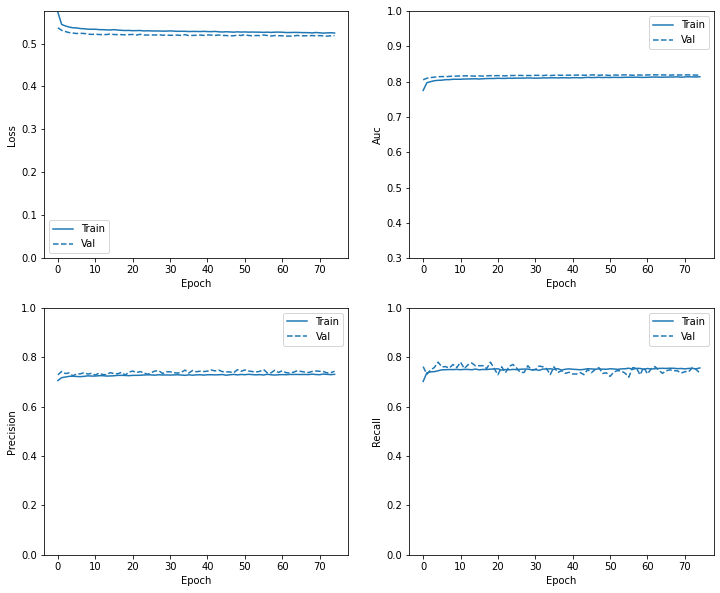

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5184459090232849
tp :  2681.0
fp :  930.0
tn :  2668.0
fn :  967.0
accuracy :  0.7382003664970398
precision :  0.7424536347389221
recall :  0.734923243522644
auc :  0.8197070360183716

(True Negatives):  2668
 (False Positives):  930
(False Negatives):  967
 (True Positives):  2681
Total Transactions:  3648


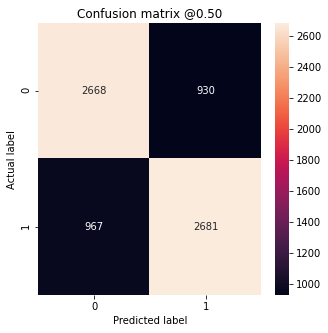

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_weighted)

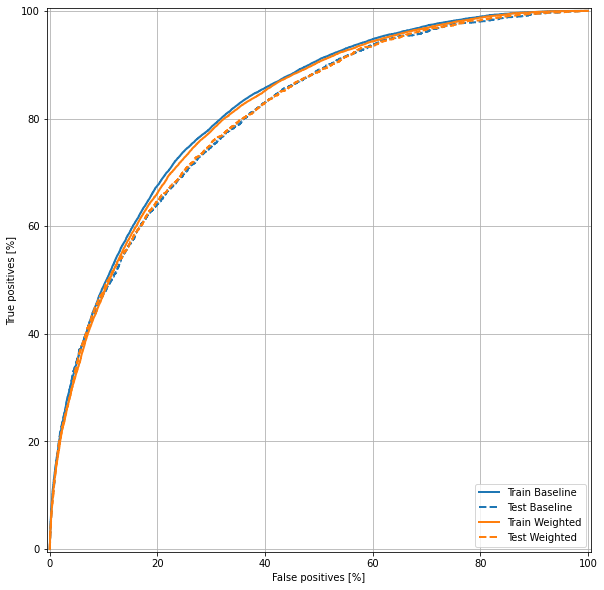

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(32628, 1, 5)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(65256, 1, 5)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [[ 1.71830398 -1.13673723 -2.17685057  0.62384352  0.08632702]]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 1, 5), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

510.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/170
510/510 [==============================] - 6s 5ms/step - loss: 0.6074 - tp: 14156.6497 - fp: 6440.0117 - tn: 13526.1859 - fn: 5890.9022 - accuracy: 0.6877 - precision: 0.6831 - recall: 0.7048 - auc: 0.7628 - val_loss: 0.5354 - val_tp: 2790.0000 - val_fp: 1051.0000 - val_tn: 2547.0000 - val_fn: 858.0000 - val_accuracy: 0.7365 - val_precision: 0.7264 - val_recall: 0.7648 - val_auc: 0.8054
Epoch 2/170
510/510 [==============================] - 2s 4ms/step - loss: 0.5484 - tp: 11934.6830 - fp: 4756.3014 - tn: 11650.7417 - fn: 4426.0235 - accuracy: 0.7175 - precision: 0.7127 - recall: 0.7268 - auc: 0.7932 - val_loss: 0.5289 - val_tp: 2829.0000 - val_fp: 1054.0000 - val_tn: 2544.0000 - val_fn: 819.0000 - val_accuracy: 0.7415 - val_precision: 0.7286 - val_recall: 0.7755 - val_auc: 0.8106
Epoch 3/170
510/510 [==============================] - 2s 4ms/step - loss: 0.5406 - tp: 12027.2779 - fp: 4643.0528 - tn: 11808.1996 - fn: 4289.2192 - accuracy: 0.7271 - precision: 0.7202 - recall:

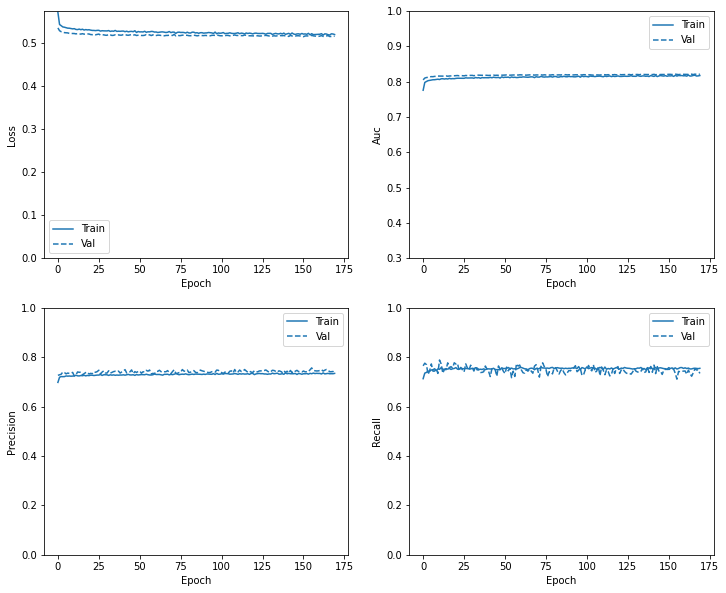

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=2*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/340
20/20 [==============================] - 5s 59ms/step - loss: 0.7008 - tp: 2889.5714 - fp: 1123.3810 - tn: 3173.1429 - fn: 1461.8095 - accuracy: 0.7026 - precision: 0.7211 - recall: 0.6663 - auc: 0.7899 - val_loss: 0.6765 - val_tp: 2654.0000 - val_fp: 1538.0000 - val_tn: 2060.0000 - val_fn: 994.0000 - val_accuracy: 0.6506 - val_precision: 0.6331 - val_recall: 0.7275 - val_auc: 0.7144
Epoch 2/340
20/20 [==============================] - 0s 8ms/step - loss: 0.6712 - tp: 530.3810 - fp: 300.8095 - tn: 375.7619 - fn: 194.9524 - accuracy: 0.6415 - precision: 0.6332 - recall: 0.7234 - auc: 0.6948 - val_loss: 0.6484 - val_tp: 2741.0000 - val_fp: 1530.0000 - val_tn: 2068.0000 - val_fn: 907.0000 - val_accuracy: 0.6637 - val_precision: 0.6418 - val_recall: 0.7514 - val_auc: 0.7430
Epoch 3/340
20/20 [==============================] - 0s 8ms/step - loss: 0.6436 - tp: 509.1905 - fp: 278.0476 - tn: 428.1429 - fn: 186.5238 - accuracy: 0.6618 - precision: 0.6349 - recall: 0.7350 - auc: 0.73

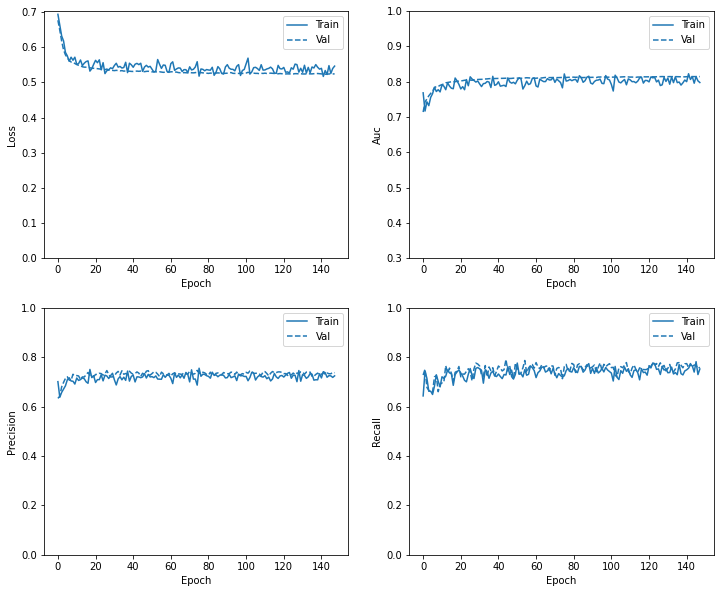

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)


loss :  0.524739682674408
tp :  2775.0
fp :  998.0
tn :  2600.0
fn :  873.0
accuracy :  0.7417885661125183
precision :  0.735489010810852
recall :  0.7606908082962036
auc :  0.8148261308670044

(True Negatives):  2600
 (False Positives):  998
(False Negatives):  873
 (True Positives):  2775
Total Transactions:  3648


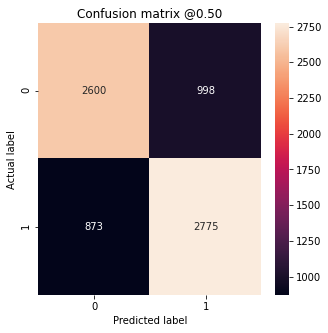

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

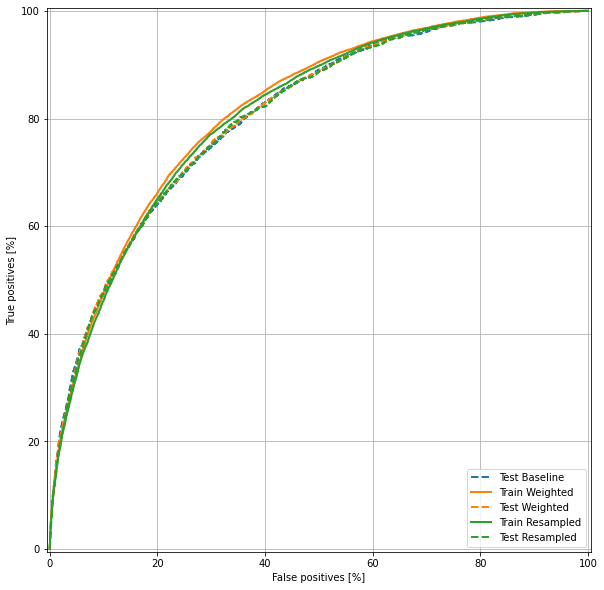

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# 1D CONV

In [191]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0                0.0  ...         0.0        0.0
4   4.0               69.0  ...         0.0        0.0

[5 rows x 14 columns]

In [192]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0                0.0  ...         0.0        0.0
4   4.0               79.0  ...         0.0        0.0

[5 rows x 14 columns]

In [193]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [194]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (104052, 13)
shape of test set  set is (25948, 13)
shape of train labels  set is (104052,)
shape of test labels  set is (25948,)


- Remove Correlated filter

In [195]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Retailer Order', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [198]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS level"],axis =1 )

In [199]:
X_train.head()

Week  Received Quantity  ...  Inventory Position  Lost Sales
0   0.0                0.0  ...                 0.0         0.0
1   1.0                0.0  ...               200.0         0.0
2   2.0                0.0  ...               131.0         0.0
3   3.0                0.0  ...               128.0         0.0
4   4.0               69.0  ...               132.0         0.0

[5 rows x 9 columns]

In [200]:
X_train.shape

(104052, 9)

In [201]:
X_test.shape

(25948, 9)

- Correlation


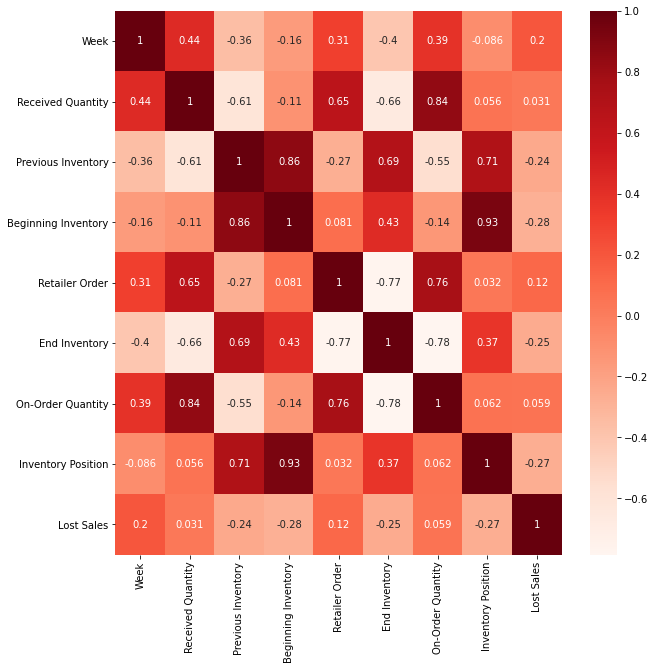

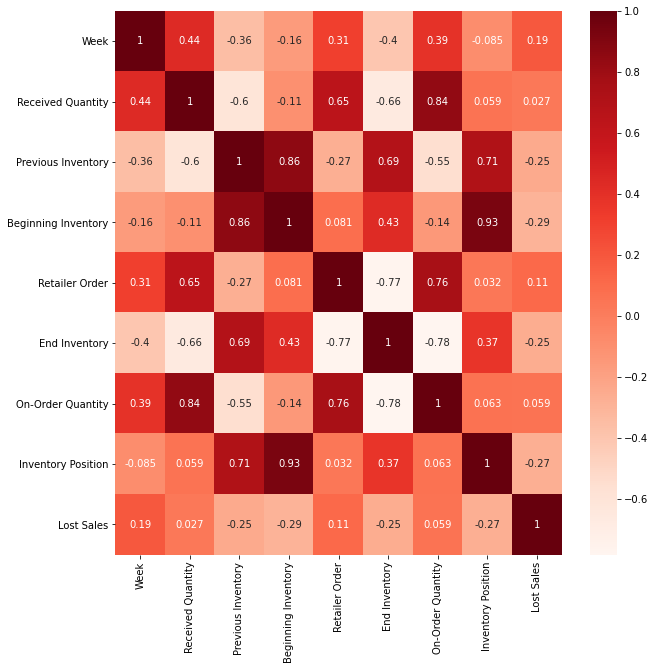

In [202]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [203]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104052
    Positive: 8186 (7.87% of total)



In [204]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, pos, 100 * pos / total))

Examples:
    Total: 25948
    Positive: 8186 (7.87% of total)



In [205]:
!pip install imbalanced-learn

In [206]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [207]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [208]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 95866, 1: 8186})


Counter({0: 23788, 1: 2160})

OVER and Under Sampling pipeline

OVER SAMPLING

In [209]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.40)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95866, 1: 38346})


UNDER SAMPLING

In [210]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 38346, 1: 38346})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [211]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
76682  1
76683  1
76684  1
76685  1
76686  1
76687  1
76688  1
76689  1
76690  1
76691  1

In [212]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2  ...          6          7         8
76662  33.000000  75.000000   0.000000  ...  80.754105  80.754105  1.245895
76663  34.826225  78.000000   2.000000  ...  78.000000  78.000000  8.000000
76664  36.415572  81.792214   7.415572  ...  80.792214  86.000000  0.000000
76665  20.000000  78.798319  11.000000  ...  77.201681  84.000000  0.000000
76666  43.981589  75.000000   0.000000  ...  78.000000  78.000000  2.000000
76667  21.163521  74.000000  10.387840  ...  74.000000  84.775681  0.000000
76668  38.000000  75.000000   0.000000  ...  79.000000  79.000000  5.000000
76669  39.321129  75.000000   3.839436  ...  76.000000  76.000000  2.000000
76670  26.887165  77.000000   0.000000  ...  83.169252  83.169252  2.000000
76671  48.422974  75.288513   5.711487  ...  74.288513  74.288513  2.000000
76672  37.000000  75.000000   4.000000  ...  77.000000  77.000000  0.000000
76673  31.000000  77.000000   8.123367  ...  77.000000  81.000000  0.000000
76674  48.179146  73.589573   2.820854  ...  73.589573  81.179146  0.000000
76675  30.063847  75.936153   0.000000  ...  77.000000  77.000000  5.063847
76676  32.746151  78.253849   0.000000  ...  82.746151  85.000000  0.000000
76677  23.874191  78.000000   0.874191  ...  81.000000  81.000000  2.000000
76678  27.952939  76.000000  17.000000  ...  76.000000  82.000000  0.000000
76679  40.921205  75.000000   0.000000  ...  81.921205  81.921205  9.000000
76680  43.000000  76.000000   0.000000  ...  77.313428  79.000000  0.000000
76681  39.385892  76.614108   0.000000  ...  81.385892  88.614108  0.000000
76682  46.884171  71.557914   0.000000  ...  75.000000  75.000000  6.557914
76683  15.721167  81.278833   4.139416  ...  80.581751  91.139416  0.000000
76684  35.000731  77.000000   0.000000  ...  82.000000  82.000000  7.000000
76685  29.216958  74.000000   0.000000  ...  77.783042  77.783042  4.216958
76686  38.155029  75.000000   0.000000  ...  81.000000  81.000000  6.000000
76687  21.596528  76.596528   0.000000  ...  82.403472  82.403472  6.000000
76688  28.000000  72.000000   0.000000  ...  76.243200  76.243200  8.243200
76689  39.838223  75.000000   0.000000  ...  79.000000  79.000000  3.838223
76690  27.000000  74.196050   0.000000  ...  77.196050  77.196050  0.000000
76691  26.000000  78.777677  10.222323  ...  75.666970  86.222323  0.000000

[30 rows x 9 columns]

In [213]:
X_train.shape

(76692, 9)

In [214]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 76692
    Positive: 38346 (50.00% of total)



In [215]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.25)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [216]:
train_df.shape

(57519, 9)

In [217]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 57519
    Positive: 28724 (49.94% of total)



In [218]:
a=pd.DataFrame(bool_train_labels)
a.shape

(57519, 1)

In [219]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (57519,)
Validation labels shape: (19173,)
Test labels shape: (25948,)
Training features shape: (57519, 9)
Validation features shape: (19173, 9)
Test features shape: (25948, 9)


In [220]:
from sklearn.decomposition import PCA

In [221]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [222]:
var_ratio

{2: 0.7465166810219613,
 3: 0.8496646370460514,
 4: 0.9296433943231527,
 5: 0.9721329815506592,
 6: 0.9904600320543204,
 7: 0.9999661814650553,
 8: 1.0,
 9: 1.0}

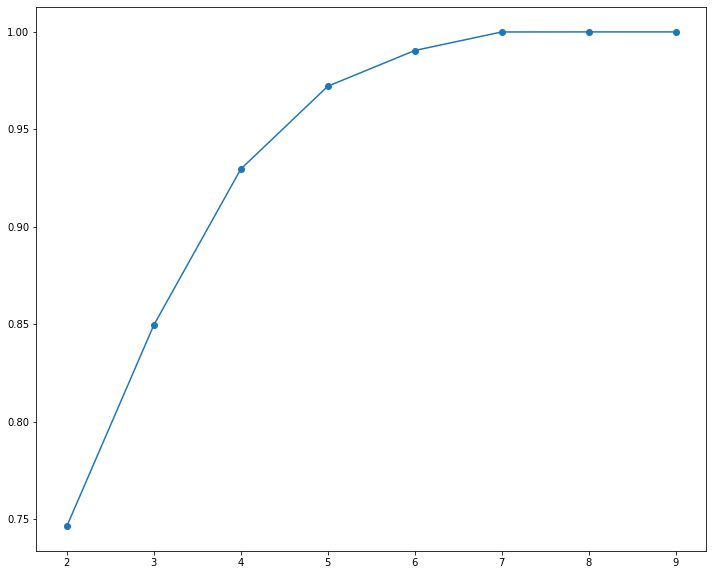

In [223]:
pd.Series(var_ratio).plot(marker="o")

In [224]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[ 0.14641987,  0.21705008, -0.56707136, -0.06291261,  0.11710541,
        -0.0689723 ],
       [-1.06491325,  0.15392861, -0.70030002, -0.91808069, -0.12175784,
         0.21455637],
       [-1.46635267,  0.28532112, -0.36369834, -0.95680482,  0.37490596,
         0.01270343],
       ...,
       [-1.72985639,  0.41409213,  0.57646796, -0.62311665,  0.15873158,
        -0.05312658],
       [ 0.41192384,  0.71542832, -0.95645002,  0.97787037,  0.09650443,
         0.0226952 ],
       [-1.2887784 , -0.18315771, -0.6093386 , -0.43347411,  0.32243954,
        -0.08038093]])

In [225]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [226]:
val_features

array([[ 1.20086216, -1.52787419, -0.03662363,  0.42163426,  0.01698646,
        -0.60540833],
       [-0.69872347, -0.27296057, -0.25919356, -0.70188929,  0.54365796,
        -0.19629236],
       [ 0.75334374, -1.37599391, -0.31336764,  0.884015  ,  0.05223395,
        -0.11503995],
       ...,
       [-1.15347433,  0.34440658, -0.6565271 , -0.35149537,  0.48632086,
        -0.11138062],
       [ 0.01489544, -0.6196574 , -0.98021494,  1.32121423, -0.29345592,
        -0.28036509],
       [ 1.25924368, -0.94216472, -0.46201207,  1.26130826, -0.04736781,
        -0.1175431 ]])

In [227]:
test_features

array([[ 4.26356611,  9.72488425, -2.31196133, -0.56038142, -1.47607532,
        -0.70454002],
       [11.49015721,  2.83245805,  1.38588759, -1.33412923, -1.11366795,
         0.72121179],
       [ 8.43939425,  2.13648966,  2.13535424,  0.6781549 ,  3.20172998,
        -1.41503805],
       ...,
       [-0.77412629, -0.42203675, -0.18305109, -1.25773095,  0.2969421 ,
        -0.14931592],
       [-1.12343736, -0.50455282, -0.04457723, -1.06152755,  0.87288455,
        -0.28514768],
       [-1.14056899, -0.31631392, -0.32842191, -1.38213466,  0.15978454,
         0.25878169]])

In [228]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0      0.146420  0.217050 -0.567071 -0.062913  0.117105 -0.068972
1     -1.064913  0.153929 -0.700300 -0.918081 -0.121758  0.214556
2     -1.466353  0.285321 -0.363698 -0.956805  0.374906  0.012703
3     -1.650029  0.940598  0.934670 -0.174645 -0.107967  0.123200
4      1.287183 -1.851907  0.453854 -0.870978  0.016050  0.022399
...         ...       ...       ...       ...       ...       ...
57514 -0.579717 -0.389058 -0.196472 -0.607925  0.615261 -0.051380
57515 -1.313163 -0.053493 -0.679747 -0.388794  0.284796 -0.101327
57516 -1.729856  0.414092  0.576468 -0.623117  0.158732 -0.053127
57517  0.411924  0.715428 -0.956450  0.977870  0.096504  0.022695
57518 -1.288778 -0.183158 -0.609339 -0.433474  0.322440 -0.080381

[57519 rows x 6 columns]

In [229]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [230]:
pos_df.shape

(28724, 6)

In [231]:
test_features.shape

(25948, 6)

In [232]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))

val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [233]:
train_features = train_features.reshape(train_features.shape[0],train_features.shape[2],1)
test_features = test_features.reshape(test_features.shape[0],test_features.shape[2],1)
val_features = val_features.reshape(val_features.shape[0],val_features.shape[2],1)

In [234]:
import keras 
from keras.models import Model 
from keras.models import Sequential
from keras.layers import Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

In [235]:
model = Sequential()
input_shape=(train_features.shape[1], 1)
model.add(Conv1D(64, kernel_size=2,padding = "same",activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64,kernel_size=3,padding = "same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))

model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 64)             192       
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 64)             256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 64)             12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 64)             256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)              

In [236]:
input_shape=(train_features.shape[1], 1)

In [237]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      Conv1D(64, kernel_size=2,padding = "same",activation="relu", input_shape=input_shape),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling1D(pool_size=(2)),
      keras.layers.Conv1D(64,kernel_size=3,padding = "same", activation="relu"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling1D(pool_size=(2)),
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation="tanh"),
      Dropout(0.2),
      Dense(32, activation="tanh"),
      Dropout(0.2),
      Dense(16, activation="relu"),
      Dropout(0.2),

#       model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(64, activation="tanh"))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation="tanh"))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation="relu"))

# model.add(Dropout(0.2))
# model.add(Dense(1, activation="sigmoid"))
# model.summary()
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(6,activation="relu"),
#       keras.layers.Dense(4,activation="relu"),
#       keras.layers.Dense(2,activation="sigmoid"),
#       keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=0.005),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [238]:
EPOCHS = 200
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [239]:
model = make_model()
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 6, 64)             192       
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 64)             256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 64)             12352     
_________________________________________________________________
batch_normalization_3 (Batch (None, 3, 64)             256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)              

In [240]:
model.predict(train_features[:10])

array([[0.4622014 ],
       [0.45595992],
       [0.447701  ],
       [0.4553279 ],
       [0.44217607],
       [0.46393213],
       [0.44661957],
       [0.4506083 ],
       [0.4692902 ],
       [0.44980288]], dtype=float32)

In [241]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7064


In [242]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.00246875])

In [243]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.49584734],
       [0.47587985],
       [0.46073434],
       [0.48506132],
       [0.45264268],
       [0.48379925],
       [0.4712355 ],
       [0.44331467],
       [0.4592163 ],
       [0.46657288]], dtype=float32)

In [244]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6821


In [245]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [246]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [247]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [248]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [249]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

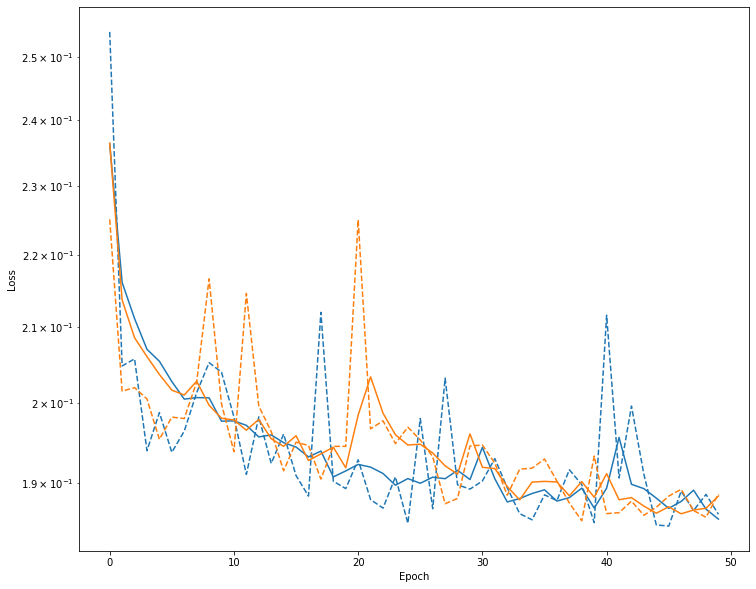

In [250]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [251]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/200
225/225 [==============================] - 7s 22ms/step - loss: 0.2712 - tp: 23092.2832 - fp: 2928.6327 - tn: 21179.0531 - fn: 1027.1814 - accuracy: 0.9176 - precision: 0.8880 - recall: 0.9560 - auc: 0.9601 - val_loss: 0.2163 - val_tp: 9342.0000 - val_fp: 1206.0000 - val_tn: 8345.0000 - val_fn: 280.0000 - val_accuracy: 0.9225 - val_precision: 0.8857 - val_recall: 0.9709 - val_auc: 0.9645
Epoch 2/200
225/225 [==============================] - 3s 14ms/step - loss: 0.2127 - tp: 14123.1814 - fp: 1811.5177 - tn: 12704.9513 - fn: 414.5000 - accuracy: 0.9244 - precision: 0.8874 - recall: 0.9728 - auc: 0.9620 - val_loss: 0.2061 - val_tp: 9417.0000 - val_fp: 1266.0000 - val_tn: 8285.0000 - val_fn: 205.0000 - val_accuracy: 0.9233 - val_precision: 0.8815 - val_recall: 0.9787 - val_auc: 0.9678
Epoch 3/200
225/225 [==============================] - 3s 14ms/step - loss: 0.2084 - tp: 14080.7788 - fp: 1800.5575 - tn: 12735.1726 - fn: 437.6416 - accuracy: 0.9232 - precision: 0.8866 - recall

In [252]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

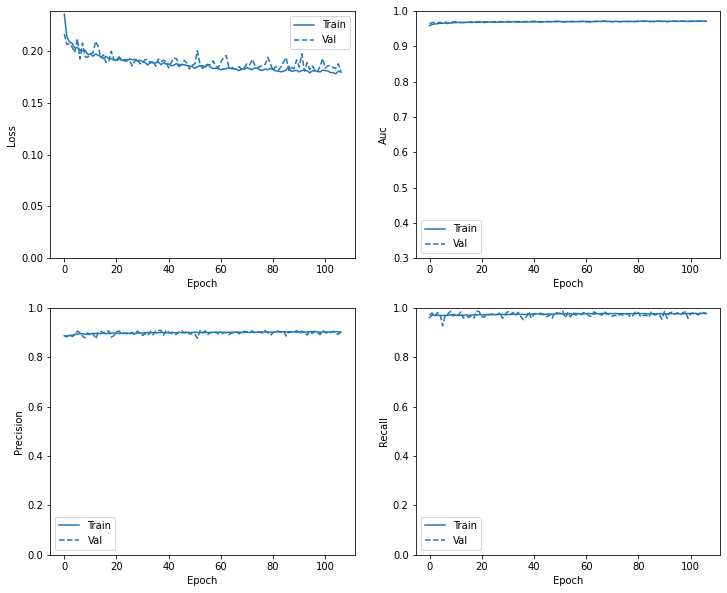

In [253]:
plot_metrics(baseline_history)

In [254]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [255]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.2178918719291687
tp :  2056.0
fp :  2369.0
tn :  21419.0
fn :  104.0
accuracy :  0.9046940207481384
precision :  0.4646327793598175
recall :  0.9518518447875977
auc :  0.9697970747947693

(True Negatives):  21419
 (False Positives):  2369
(False Negatives):  104
 (True Positives):  2056
Total Transactions:  2160


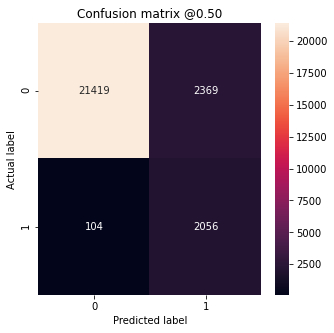

In [256]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# CONV 1D

In [257]:
test_predictions_baseline

array([[1.8809386e-06],
       [3.6690921e-02],
       [2.7575882e-06],
       ...,
       [5.7403445e-02],
       [3.0516028e-02],
       [6.6876411e-04]], dtype=float32)

In [258]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

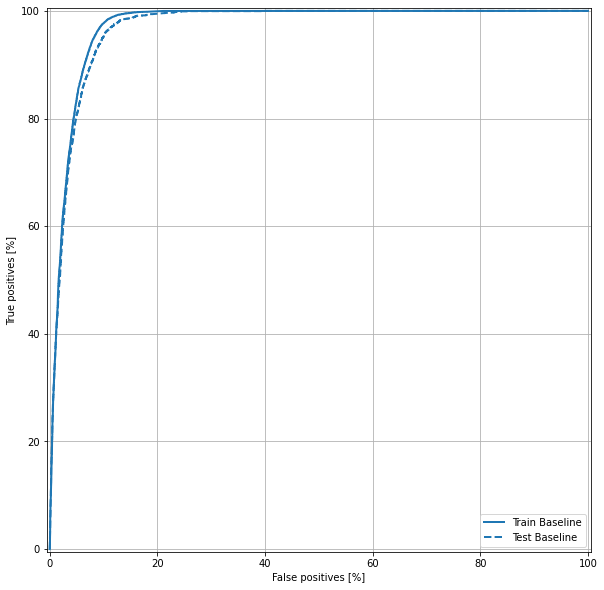

In [259]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/300
531/531 [==============================] - 8s 10ms/step - loss: 0.6911 - tp: 19345.9962 - fp: 10184.0883 - tn: 18241.9981 - fn: 8981.5113 - accuracy: 0.6669 - precision: 0.6583 - recall: 0.6902 - auc: 0.7391 - val_loss: 0.5689 - val_tp: 8803.0000 - val_fp: 4349.0000 - val_tn: 7070.0000 - val_fn: 2420.0000 - val_accuracy: 0.7010 - val_precision: 0.6693 - val_recall: 0.7844 - val_auc: 0.7772
Epoch 2/300
531/531 [==============================] - 4s 8ms/step - loss: 0.5930 - tp: 12254.1692 - fp: 5807.2820 - tn: 11185.0019 - fn: 4865.1410 - accuracy: 0.6857 - precision: 0.6764 - recall: 0.7155 - auc: 0.7521 - val_loss: 0.5475 - val_tp: 8549.0000 - val_fp: 3578.0000 - val_tn: 7841.0000 - val_fn: 2674.0000 - val_accuracy: 0.7239 - val_precision: 0.7050 - val_recall: 0.7617 - val_auc: 0.7963
Epoch 3/300
531/531 [==============================] - 4s 8ms/step - loss: 0.5774 - tp: 12434.4530 - fp: 5574.5883 - tn: 11464.8853 - fn: 4637.6673 - accuracy: 0.6994 - precision: 0.6898 - rec

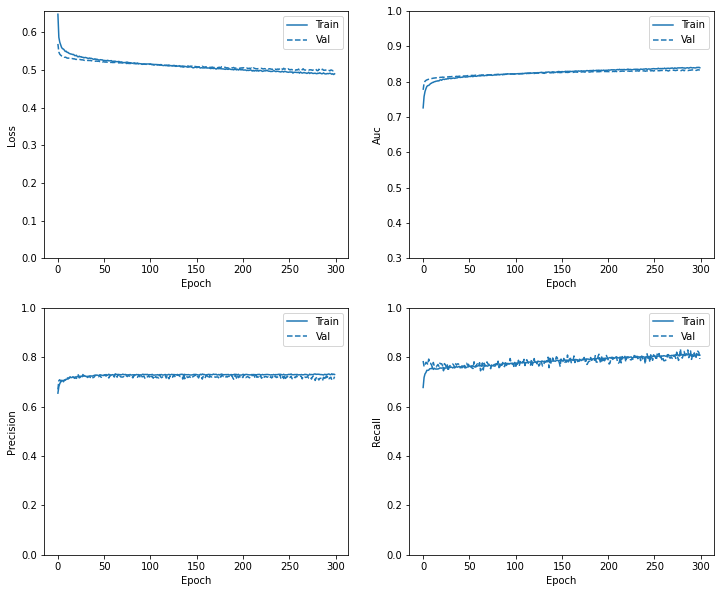

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.4981033205986023
tp :  8896.0
fp :  3444.0
tn :  7975.0
fn :  2327.0
accuracy :  0.7451196908950806
precision :  0.7209076285362244
recall :  0.7926579117774963
auc :  0.8337280750274658

(True Negatives):  7975
 (False Positives):  3444
(False Negatives):  2327
 (True Positives):  8896
Total Transactions:  11223


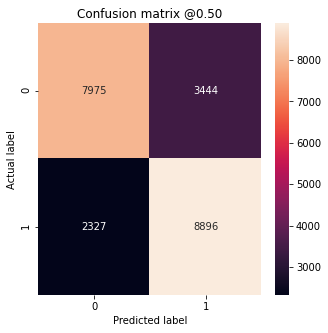

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_weighted)

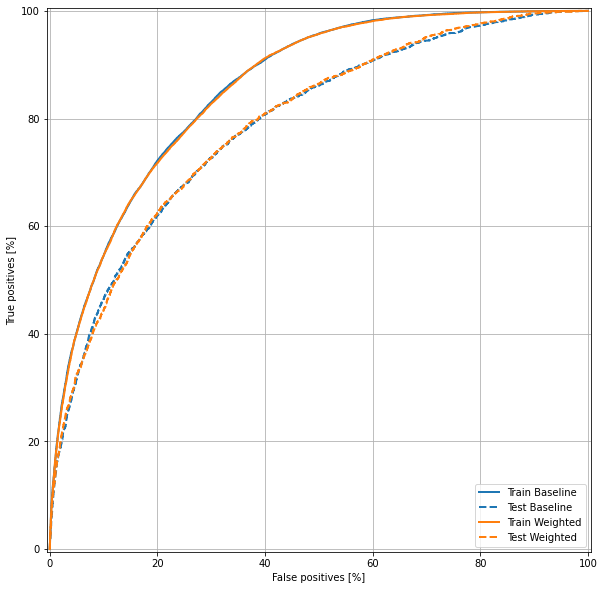

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(33864, 6, 1)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(67728, 6, 1)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [[-1.41463932]
 [-1.03407157]
 [-0.09692102]
 [ 0.93895215]
 [-0.24508446]
 [ 0.11068057]]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 6, 1), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5546875


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

530.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/300
530/530 [==============================] - 8s 11ms/step - loss: 0.6947 - tp: 11682.1356 - fp: 10759.2222 - tn: 21390.7797 - fn: 7680.6215 - accuracy: 0.6443 - precision: 0.4883 - recall: 0.5927 - auc: 0.6998 - val_loss: 0.5705 - val_tp: 8869.0000 - val_fp: 4500.0000 - val_tn: 6919.0000 - val_fn: 2354.0000 - val_accuracy: 0.6973 - val_precision: 0.6634 - val_recall: 0.7903 - val_auc: 0.7745
Epoch 2/300
530/530 [==============================] - 5s 9ms/step - loss: 0.5924 - tp: 12275.5367 - fp: 5872.9115 - tn: 11091.1488 - fn: 4808.1620 - accuracy: 0.6860 - precision: 0.6778 - recall: 0.7194 - auc: 0.7520 - val_loss: 0.5478 - val_tp: 8535.0000 - val_fp: 3609.0000 - val_tn: 7810.0000 - val_fn: 2688.0000 - val_accuracy: 0.7219 - val_precision: 0.7028 - val_recall: 0.7605 - val_auc: 0.7955
Epoch 3/300
530/530 [==============================] - 4s 8ms/step - loss: 0.5757 - tp: 12430.2863 - fp: 5627.9831 - tn: 11375.9416 - fn: 4613.5480 - accuracy: 0.6988 - precision: 0.6896 - rec

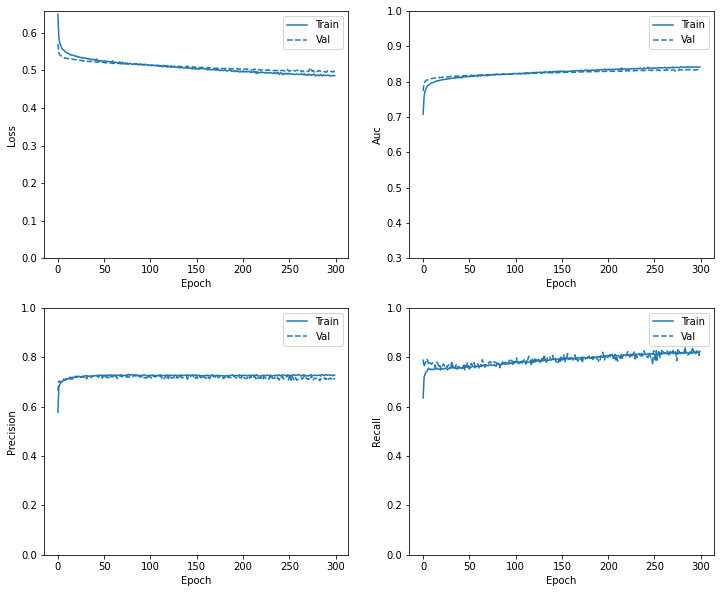

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/600
20/20 [==============================] - 4s 79ms/step - loss: 0.8108 - tp: 9618.0476 - fp: 4133.4286 - tn: 7994.5238 - fn: 2297.9048 - accuracy: 0.7328 - precision: 0.6995 - recall: 0.8076 - auc: 0.8206 - val_loss: 0.6972 - val_tp: 7965.0000 - val_fp: 8889.0000 - val_tn: 2530.0000 - val_fn: 3258.0000 - val_accuracy: 0.4635 - val_precision: 0.4726 - val_recall: 0.7097 - val_auc: 0.4552
Epoch 2/600
20/20 [==============================] - 1s 32ms/step - loss: 0.7430 - tp: 309.6667 - fp: 288.4762 - tn: 412.7619 - fn: 391.0000 - accuracy: 0.5152 - precision: 0.5273 - recall: 0.4430 - auc: 0.5329 - val_loss: 0.6902 - val_tp: 10341.0000 - val_fp: 10387.0000 - val_tn: 1032.0000 - val_fn: 882.0000 - val_accuracy: 0.5023 - val_precision: 0.4989 - val_recall: 0.9214 - val_auc: 0.5821
Epoch 3/600
20/20 [==============================] - 1s 33ms/step - loss: 0.7482 - tp: 355.6190 - fp: 276.6190 - tn: 386.8095 - fn: 382.8571 - accuracy: 0.5209 - precision: 0.5680 - recall: 0.4702 - auc:

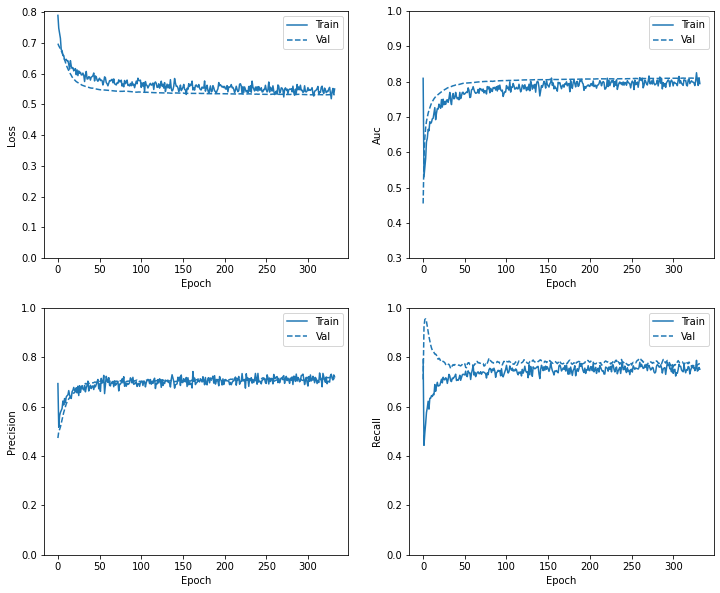

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5311693549156189
tp :  8702.0
fp :  3499.0
tn :  7920.0
fn :  2521.0
accuracy :  0.7341224551200867
precision :  0.7132202386856079
recall :  0.7753720283508301
auc :  0.810551643371582

(True Negatives):  7920
 (False Positives):  3499
(False Negatives):  2521
 (True Positives):  8702
Total Transactions:  11223


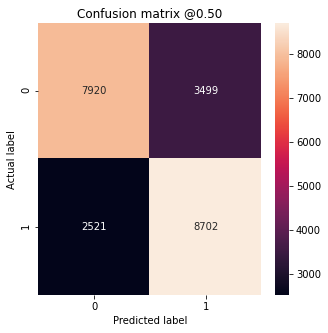

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

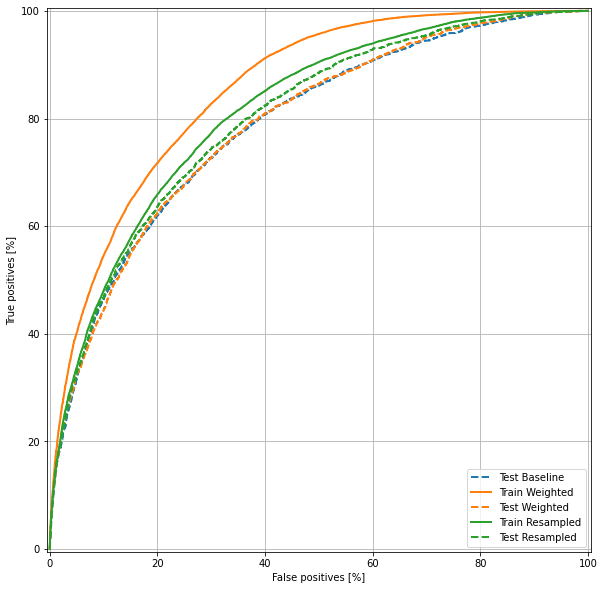

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# DNN


In [ ]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0               69.0  ...         0.0        0.0
4   4.0               72.0  ...         0.0        0.0

[5 rows x 14 columns]

In [ ]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0               79.0  ...         0.0        0.0
4   4.0               85.0  ...         0.0        0.0

[5 rows x 14 columns]

In [ ]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [ ]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (104052, 13)
shape of test set  set is (25948, 13)
shape of train labels  set is (104052,)
shape of test labels  set is (25948,)


- Remove Correlated filter

In [ ]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Customer Demand', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS Level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [ ]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis =1 )


In [ ]:
X_train.head()

Week  Received Quantity  ...  Inventory Position  Lost Sales
0   0.0                0.0  ...                 0.0         0.0
1   1.0                0.0  ...               131.0         0.0
2   2.0                0.0  ...               125.0         0.0
3   3.0               69.0  ...               137.0         0.0
4   4.0               72.0  ...               109.0         0.0

[5 rows x 9 columns]

In [ ]:
X_train.shape

(104052, 9)

In [ ]:
X_test.shape

(25948, 9)

- Correlation


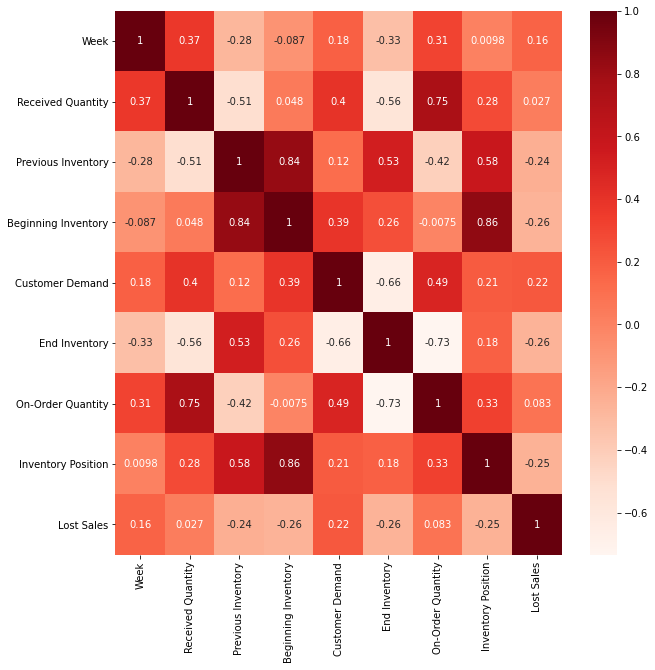

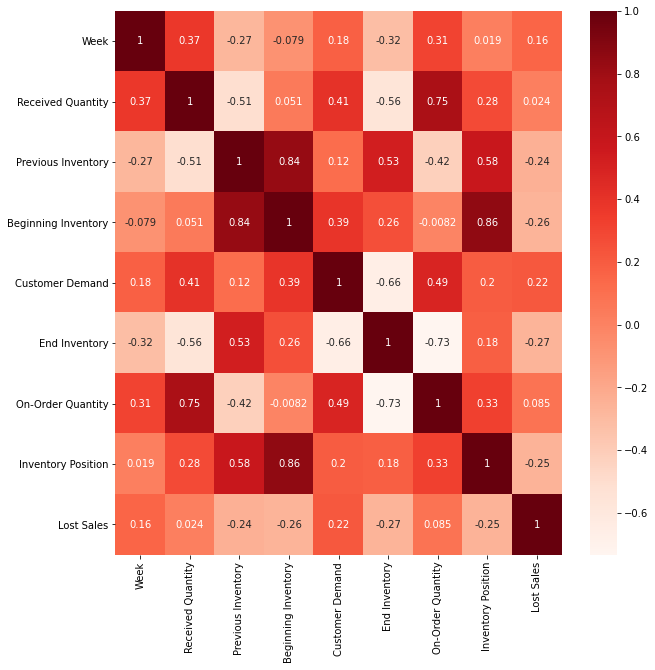

In [ ]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104052
    Positive: 8211 (7.89% of total)



In [ ]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, pos, 100 * pos / total))

Examples:
    Total: 25948
    Positive: 8211 (7.89% of total)



In [ ]:
!pip install imbalanced-learn

In [ ]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [ ]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 95841, 1: 8211})


Counter({0: 23792, 1: 2156})

OVER and Under Sampling pipeline

In [ ]:
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.2)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

OVER SAMPLING

In [ ]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.4)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95841, 1: 38336})


UNDER SAMPLING

In [ ]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 38336, 1: 38336})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
76662  1
76663  1
76664  1
76665  1
76666  1
76667  1
76668  1
76669  1
76670  1
76671  1

In [ ]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2  ...          6           7          8
76642  19.585583  81.414417   0.000000  ...  85.585583   85.585583   5.585583
76643  40.765494  79.469013   0.765494  ...  80.000000   80.000000   4.234506
76644  24.580007  75.839987   1.160013  ...  82.839987   82.839987   0.000000
76645  33.475208  84.983472   2.000000  ...  82.000000   93.508264   0.000000
76646  22.000000  73.555157  17.000000  ...  81.224213   83.889685   0.000000
76647  24.000000  80.275116   0.000000  ...  83.275116   83.275116   2.724884
76648  24.562017  81.281008   7.000000  ...  78.718992   87.437983   0.000000
76649  28.247253  81.000000   6.000000  ...  80.752747   81.505494   0.494506
76650  43.211987  70.000000   0.000000  ...  86.817981   86.817981   4.394006
76651  27.163634  85.672731   0.000000  ...  84.163634   89.000000   0.000000
76652  29.446125  75.276938  30.723062  ...  75.446125   98.000000   0.000000
76653  31.556222  75.481259   0.000000  ...  84.518741   84.518741  11.518741
76654  24.604086  80.597276  10.201362  ...  81.201362   87.402724   0.000000
76655  41.500594  77.000000   0.000000  ...  88.000000   88.000000   9.001188
76656  32.718565  80.718565   6.562871  ...  79.718565   94.000000   0.000000
76657  46.840013  72.719996   0.000000  ...  84.280004   84.280004   3.000000
76658  31.469522  81.060956   0.000000  ...  86.000000   89.469522   0.000000
76659   9.318213  66.009072  40.009072  ...  77.654570  108.663643   0.000000
76660  23.307498  74.871665   8.564167  ...  76.743330   89.435833   0.000000
76661  30.108889  79.663334  20.227777  ...  82.554445   93.554445   0.000000
76662  37.707677  71.415354   0.000000  ...  79.707677   79.707677   3.292323
76663   5.955395  79.821580  51.821580  ...  70.267630   99.044605   0.000000
76664  16.857893  81.142107  16.000000  ...  80.786839   97.000000   0.000000
76665  32.448007  68.560008  44.775997  ...  75.887998  104.224003   0.000000
76666  11.215871  82.378839  20.810581  ...  76.405290  102.784129   0.000000
76667  29.656640  69.000000   0.328320  ...  75.015039   75.015039  10.000000
76668  48.359798  85.920606   0.000000  ...  86.000000   86.000000   3.359798
76669  13.000000  77.005556   1.988888  ...  88.005556   96.022224   0.000000
76670  44.000000  78.000000  12.444051  ...  78.222025   84.000000   0.000000
76671  43.908540  73.000000   0.000000  ...  78.454270   78.454270  10.545730

[30 rows x 9 columns]

In [ ]:
X_train.shape

(76672, 9)

In [ ]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 76672
    Positive: 38336 (50.00% of total)



In [ ]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.1)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
train_df.shape

(69004, 9)

In [ ]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 69004
    Positive: 34499 (50.00% of total)



In [ ]:
a=pd.DataFrame(bool_train_labels)
a.shape

(69004, 1)

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (69004,)
Validation labels shape: (7668,)
Test labels shape: (25948,)
Training features shape: (69004, 9)
Validation features shape: (7668, 9)
Test features shape: (25948, 9)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
var_ratio={}
for n in range(2,9):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [ ]:
var_ratio

{2: 0.6684066981310944,
 3: 0.7997793184420291,
 4: 0.8932105337806469,
 5: 0.9556575798420681,
 6: 0.9913327358768378,
 7: 0.9998698611366552,
 8: 0.9999888464956384}

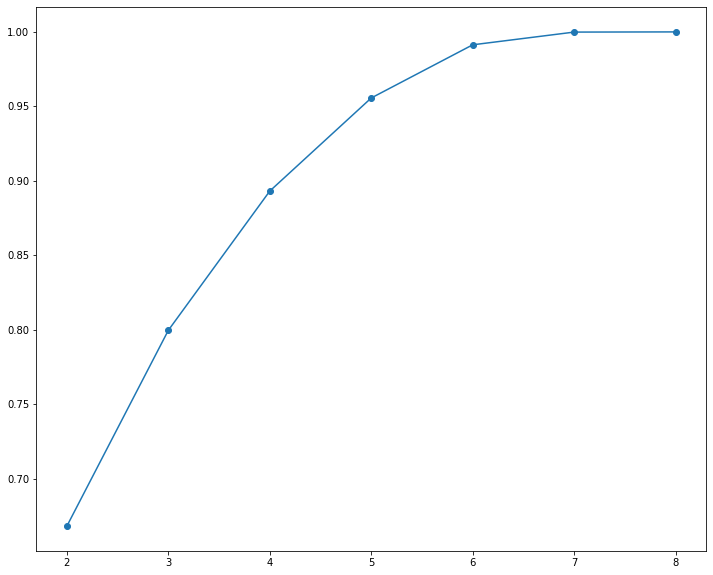

In [ ]:
pd.Series(var_ratio).plot(marker="o")

In [ ]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[ 0.07322417, -0.04795704, -0.62696727, -0.60212279, -0.05677223,
         0.14948957],
       [-1.71096863, -0.02542433,  1.83603574,  0.07069637,  0.24248222,
        -0.93012613],
       [-1.38374568,  0.02272704,  0.88799447, -0.99742688,  0.44961176,
        -0.36349155],
       ...,
       [-0.19151306, -0.21511375,  1.06225665, -0.52621453, -0.13359615,
        -0.02635708],
       [-0.9750062 , -0.02658404,  0.68514961, -1.11969613,  0.36499536,
        -0.06600796],
       [ 0.85048686,  0.36267291,  0.73607042, -1.21911692,  0.03603136,
         0.21328652]])

In [ ]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [ ]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2  ...         6         7         8
0     -0.591035  0.349203 -0.807008  ...  0.454206 -0.689433  1.316965
1      0.860060  0.349203 -0.150058  ... -0.090425  0.139985 -0.401662
2     -0.650604  0.895028 -0.051516  ...  0.463272  0.552331 -0.401662
3      0.575078  0.556508 -0.807008  ...  0.540852 -0.273153 -0.401662
4      0.074005  0.071315 -0.807008  ...  0.225973 -0.808411  0.258487
...         ...       ...       ...  ...       ...       ...       ...
68999 -0.794477  0.758572  0.868214  ... -0.248624  1.871838 -0.401662
69000 -1.585778  0.690343  0.211264  ...  0.384172 -0.107423 -0.401662
69001  0.764424 -0.196623 -0.565872  ... -0.538962 -0.890880 -0.401662
69002 -0.925714  0.068300 -0.381914  ...  0.230604 -0.354830 -0.401662
69003 -1.441905  0.144518  0.769672  ... -0.406823  0.428627 -0.401662

[69004 rows x 9 columns]

In [ ]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [ ]:
pos_df.shape

(34499, 9)

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
        11, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(6,activation="relu"),
      keras.layers.Dense(4,activation="tanh"),
      keras.layers.Dense(2,activation="sigmoid"),
      keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=0.0005),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
EPOCHS = 200
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 11)                110       
_________________________________________________________________
dropout_112 (Dropout)        (None, 11)                0         
_________________________________________________________________
dense_159 (Dense)            (None, 8)                 96        
_________________________________________________________________
dropout_113 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_160 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_114 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_161 (Dense)            (None, 8)               

In [ ]:
model.predict(train_features[:10])

array([[0.76990104],
       [0.77179646],
       [0.77039444],
       [0.76898706],
       [0.77251637],
       [0.7709359 ],
       [0.77043045],
       [0.78981155],
       [0.76839423],
       [0.7739339 ]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.8697


In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.0001739])

In [ ]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.46635535],
       [0.4731044 ],
       [0.47132123],
       [0.46818423],
       [0.46811453],
       [0.47297233],
       [0.4708831 ],
       [0.47317457],
       [0.46749115],
       [0.4714416 ]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6980


In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

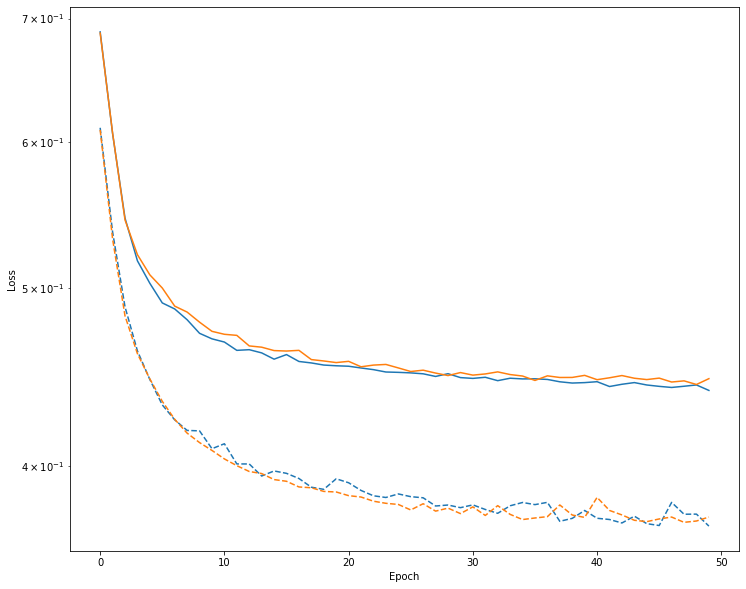

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(test_features, test_labels))

Epoch 1/200
270/270 [==============================] - 5s 8ms/step - loss: 0.7034 - tp: 7396.8819 - fp: 4537.7380 - tn: 16781.4465 - fn: 13766.1328 - accuracy: 0.5900 - precision: 0.6398 - recall: 0.3850 - auc: 0.6676 - val_loss: 0.5736 - val_tp: 1835.0000 - val_fp: 5202.0000 - val_tn: 18590.0000 - val_fn: 321.0000 - val_accuracy: 0.7872 - val_precision: 0.2608 - val_recall: 0.8511 - val_auc: 0.8770
Epoch 2/200
270/270 [==============================] - 1s 4ms/step - loss: 0.6273 - tp: 13185.9815 - fp: 7036.0221 - tn: 10378.6015 - fn: 4213.5941 - accuracy: 0.6726 - precision: 0.6484 - recall: 0.7564 - auc: 0.7140 - val_loss: 0.5239 - val_tp: 1878.0000 - val_fp: 5324.0000 - val_tn: 18468.0000 - val_fn: 278.0000 - val_accuracy: 0.7841 - val_precision: 0.2608 - val_recall: 0.8711 - val_auc: 0.8585
Epoch 3/200
270/270 [==============================] - 1s 4ms/step - loss: 0.5568 - tp: 13503.7970 - fp: 6458.6310 - tn: 10913.0406 - fn: 3938.7306 - accuracy: 0.7004 - precision: 0.6764 - recal

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

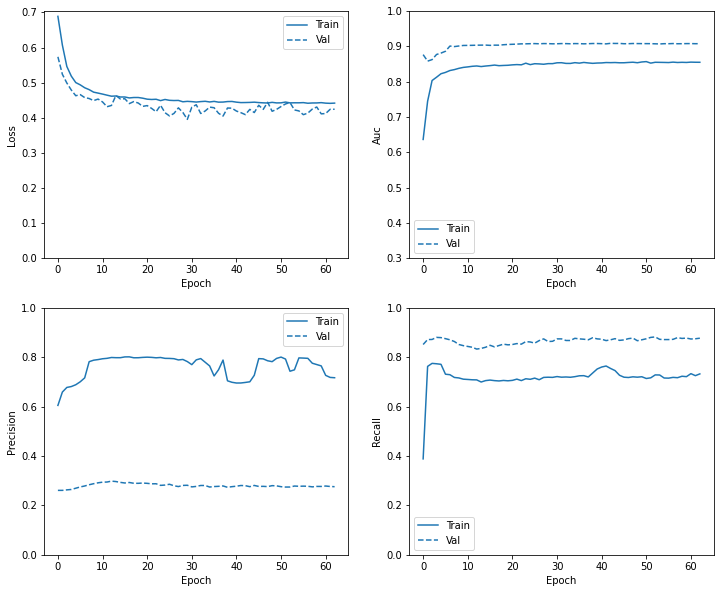

In [ ]:
plot_metrics(baseline_history)

In [ ]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [ ]:
def plot_cm(labels, predictions, p=0.46):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.4090035855770111
tp :  1876.0
fp :  4830.0
tn :  18962.0
fn :  280.0
accuracy :  0.803067684173584
precision :  0.27974948287010193
recall :  0.8701298832893372
auc :  0.9089685678482056

(True Negatives):  17586
 (False Positives):  6206
(False Negatives):  163
 (True Positives):  1993
Total Transactions:  2156


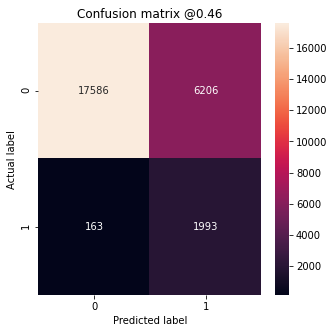

In [ ]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# DNN

In [ ]:
test_predictions_baseline

array([[0.18966809],
       [0.4776491 ],
       [0.62751967],
       ...,
       [0.60885984],
       [0.4531247 ],
       [0.40109062]], dtype=float32)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

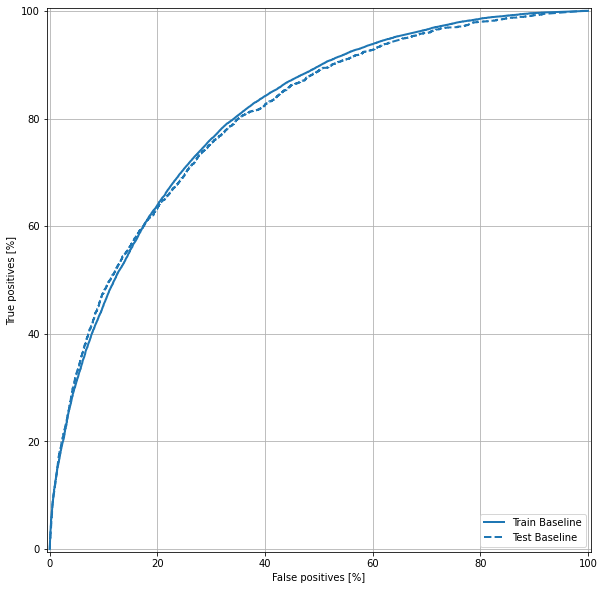

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/200
298/298 [==============================] - 5s 6ms/step - loss: 0.6969 - tp: 16793.1171 - fp: 14113.7324 - tn: 9344.4181 - fn: 6599.4515 - accuracy: 0.5677 - precision: 0.5539 - recall: 0.7235 - auc: 0.6206 - val_loss: 0.6619 - val_tp: 2890.0000 - val_fp: 1327.0000 - val_tn: 2913.0000 - val_fn: 1323.0000 - val_accuracy: 0.6865 - val_precision: 0.6853 - val_recall: 0.6860 - val_auc: 0.7370
Epoch 2/200
298/298 [==============================] - 1s 3ms/step - loss: 0.6704 - tp: 10991.2609 - fp: 7119.2876 - tn: 12035.2809 - fn: 8251.8896 - accuracy: 0.5972 - precision: 0.6053 - recall: 0.5693 - auc: 0.6399 - val_loss: 0.6341 - val_tp: 3157.0000 - val_fp: 1461.0000 - val_tn: 2779.0000 - val_fn: 1056.0000 - val_accuracy: 0.7022 - val_precision: 0.6836 - val_recall: 0.7493 - val_auc: 0.7484
Epoch 3/200
298/298 [==============================] - 1s 4ms/step - loss: 0.6455 - tp: 11657.1873 - fp: 7001.8763 - tn: 12169.8763 - fn: 7568.7793 - accuracy: 0.6200 - precision: 0.6246 - recal

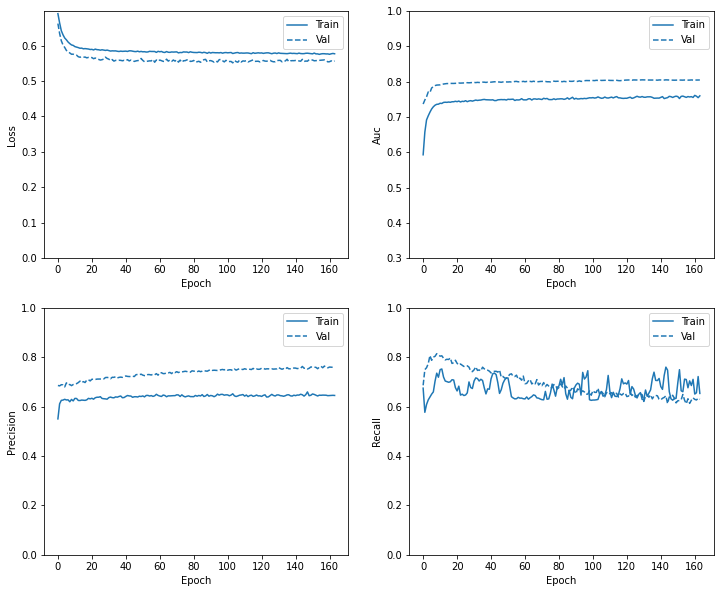

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5556675791740417
tp :  2711.0
fp :  879.0
tn :  3361.0
fn :  1502.0
accuracy :  0.7183248400688171
precision :  0.7551531791687012
recall :  0.6434844732284546
auc :  0.8055305480957031

(True Negatives):  3381
 (False Positives):  859
(False Negatives):  1526
 (True Positives):  2687
Total Transactions:  4213


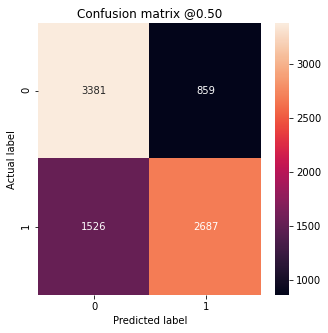

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_baseline)

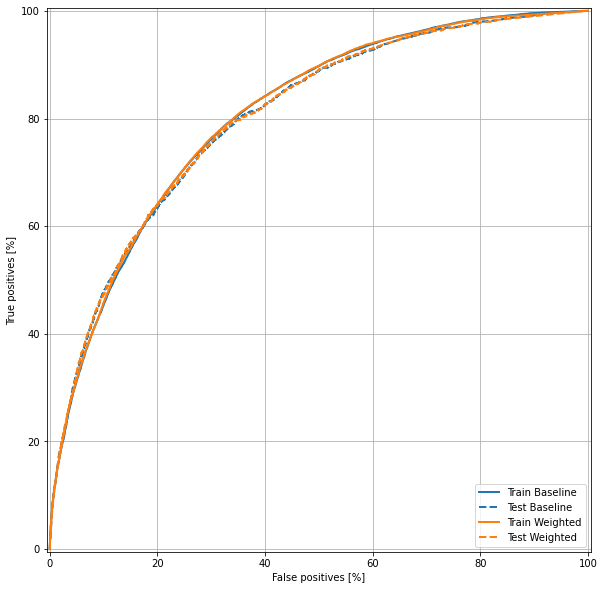

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(38024, 6)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(76048, 6)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 3.54921003 -0.62483459 -2.17698193  0.06235498  1.56902391  0.84214184]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 6), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5078125


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

298.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/200
298/298 [==============================] - 4s 8ms/step - loss: 0.6959 - tp: 16066.3913 - fp: 16828.1940 - tn: 17443.1639 - fn: 5526.3946 - accuracy: 0.6156 - precision: 0.4744 - recall: 0.7470 - auc: 0.6845 - val_loss: 0.6614 - val_tp: 2856.0000 - val_fp: 1273.0000 - val_tn: 2967.0000 - val_fn: 1357.0000 - val_accuracy: 0.6889 - val_precision: 0.6917 - val_recall: 0.6779 - val_auc: 0.7363
Epoch 2/200
298/298 [==============================] - 1s 5ms/step - loss: 0.6685 - tp: 11092.9130 - fp: 7005.7759 - tn: 12187.0769 - fn: 8113.3779 - accuracy: 0.6048 - precision: 0.6133 - recall: 0.5730 - auc: 0.6459 - val_loss: 0.6332 - val_tp: 3115.0000 - val_fp: 1415.0000 - val_tn: 2825.0000 - val_fn: 1098.0000 - val_accuracy: 0.7027 - val_precision: 0.6876 - val_recall: 0.7394 - val_auc: 0.7401
Epoch 3/200
298/298 [==============================] - 1s 5ms/step - loss: 0.6466 - tp: 11546.4348 - fp: 7022.5853 - tn: 12212.3278 - fn: 7617.7960 - accuracy: 0.6180 - precision: 0.6212 - reca

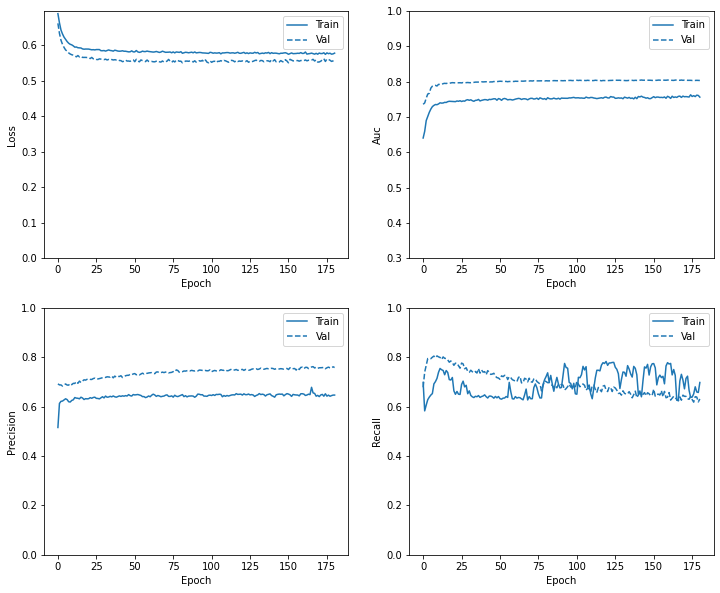

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=2*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/400
20/20 [==============================] - 3s 53ms/step - loss: 0.7012 - tp: 3800.4762 - fp: 1968.9524 - tn: 3654.0952 - fn: 1833.2857 - accuracy: 0.6654 - precision: 0.6667 - recall: 0.6721 - auc: 0.7492 - val_loss: 0.6930 - val_tp: 4213.0000 - val_fp: 4240.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.4984 - val_precision: 0.4984 - val_recall: 1.0000 - val_auc: 0.5891
Epoch 2/400
20/20 [==============================] - 0s 9ms/step - loss: 0.7003 - tp: 1156.9524 - fp: 1081.9524 - tn: 275.6667 - fn: 289.2381 - accuracy: 0.5135 - precision: 0.5222 - recall: 0.7999 - auc: 0.5082 - val_loss: 0.6914 - val_tp: 4213.0000 - val_fp: 4240.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.4984 - val_precision: 0.4984 - val_recall: 1.0000 - val_auc: 0.6445
Epoch 3/400
20/20 [==============================] - 0s 10ms/step - loss: 0.6989 - tp: 1103.0000 - fp: 1108.3810 - tn: 290.0000 - fn: 302.4286 - accuracy: 0.4965 - precision: 0.4952 - recall: 0.7874 

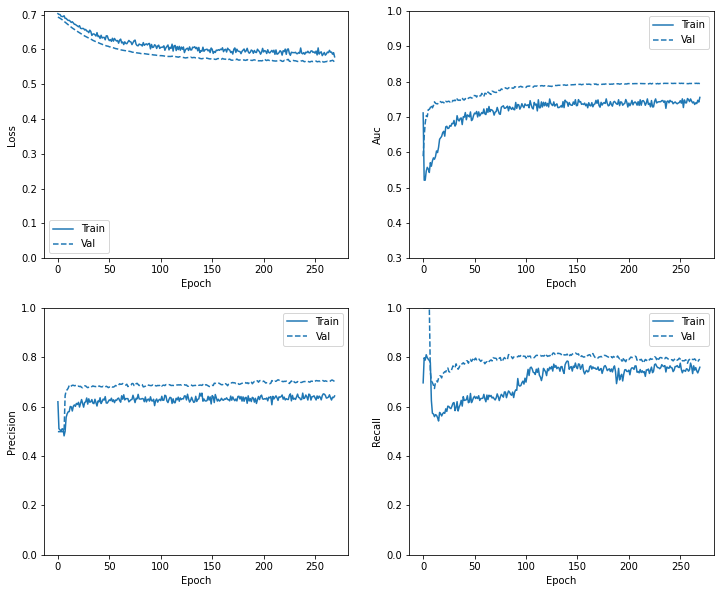

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5651955604553223
tp :  3353.0
fp :  1441.0
tn :  2799.0
fn :  860.0
accuracy :  0.7277889251708984
precision :  0.699415922164917
recall :  0.7958699464797974
auc :  0.7958680391311646

(True Negatives):  2799
 (False Positives):  1441
(False Negatives):  860
 (True Positives):  3353
Total Transactions:  4213


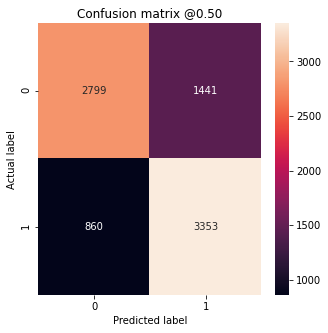

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

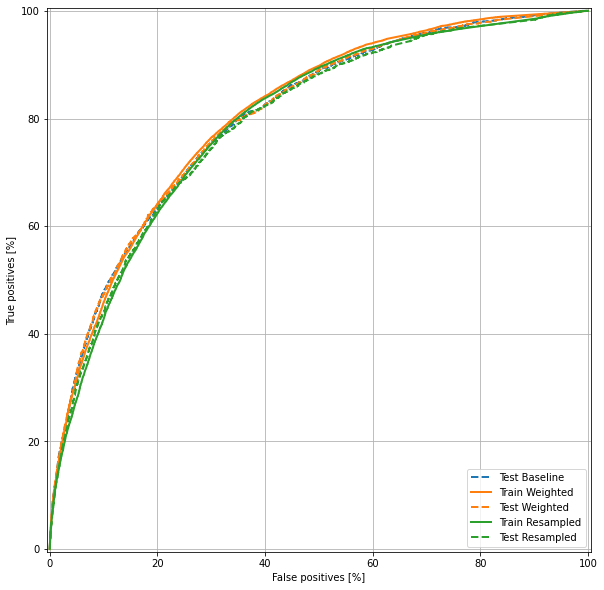

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')